In [1]:
import os
import numpy as np
from tqdm.notebook import tqdm

from utils.eeg import get_raw

from conf.eeg_channel_picks import hackathon
from conf.eeg_channel_order import standard_19_channel
from conf.eeg_annotations import braincapture_annotations, tuh_eeg_artefact_annotations

from utils.data_processing import load_data_dict, get_data

In [2]:
data_folder = r'C:/Users/wille/OneDrive - Danmarks Tekniske Universitet/Dokumenter/0. Thesis/trustworthy-causal-ai/data/'

# BrainCapture Bhutan Dataset

In [3]:
bhutan_hackathon_path = data_folder + 'hackathon 01/BC Bhutan/v4.0/'

bhutan_folders = os.listdir(bhutan_hackathon_path)
len(bhutan_folders)

133

In [4]:
subject = 'S001'
session = 'R01'

example_file = bhutan_hackathon_path + f'{subject}/{subject}{session}.edf'

raw = get_raw(example_file, hackathon, standard_19_channel)
raw

Creating RawArray with float64 data, n_channels=20, n_times=478208
    Range : 0 ... 478207 =      0.000 ...  1867.996 secs
Ready.


<RawArray | 20 x 478208 (1868.0 s), ~73.0 MB, data loaded>

In [5]:
data_dict = load_data_dict(data_folder_path=bhutan_hackathon_path, channel_picks=hackathon, channel_order=standard_19_channel, annotation_dict=braincapture_annotations, tmin=-0.5, tlen=6, labels=True)

  0%|          | 0/133 [00:00<?, ?it/s]

Creating RawArray with float64 data, n_channels=20, n_times=478208
    Range : 0 ... 478207 =      0.000 ...  1867.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


  1%|          | 1/133 [00:00<01:56,  1.13it/s]

Creating RawArray with float64 data, n_channels=20, n_times=463872
    Range : 0 ... 463871 =      0.000 ...  1811.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


  2%|▏         | 2/133 [00:01<01:57,  1.12it/s]

Creating RawArray with float64 data, n_channels=20, n_times=472832
    Range : 0 ... 472831 =      0.000 ...  1846.996 secs
Ready.
['Eye blinking' 'Eyes closed' 'Eyes opened' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


  2%|▏         | 3/133 [00:02<01:55,  1.12it/s]

Creating RawArray with float64 data, n_channels=20, n_times=521216
    Range : 0 ... 521215 =      0.000 ...  2035.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


  3%|▎         | 4/133 [00:03<01:58,  1.09it/s]

Creating RawArray with float64 data, n_channels=20, n_times=467200
    Range : 0 ... 467199 =      0.000 ...  1824.996 secs
Ready.
['Eye blinking' 'Eye blinking' 'Eye movement left-right' 'Eyes closed'
 'Eyes opened' 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


  4%|▍         | 5/133 [00:04<02:00,  1.06it/s]

Creating RawArray with float64 data, n_channels=20, n_times=478464
    Range : 0 ... 478463 =      0.000 ...  1868.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


  5%|▍         | 6/133 [00:05<01:59,  1.06it/s]

Creating RawArray with float64 data, n_channels=20, n_times=470272
    Range : 0 ... 470271 =      0.000 ...  1836.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


  5%|▌         | 7/133 [00:06<01:56,  1.08it/s]

Creating RawArray with float64 data, n_channels=20, n_times=702464
    Range : 0 ... 702463 =      0.000 ...  2743.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


  6%|▌         | 8/133 [00:07<02:10,  1.04s/it]

Creating RawArray with float64 data, n_channels=20, n_times=486144
    Range : 0 ... 486143 =      0.000 ...  1898.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Eyes opened' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 9 events and 1537 original time points ...
0 bad epochs dropped


  7%|▋         | 9/133 [00:08<02:06,  1.02s/it]

Creating RawArray with float64 data, n_channels=20, n_times=470272
    Range : 0 ... 470271 =      0.000 ...  1836.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


  8%|▊         | 10/133 [00:09<02:01,  1.01it/s]

Creating RawArray with float64 data, n_channels=20, n_times=465408
    Range : 0 ... 465407 =      0.000 ...  1817.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


  8%|▊         | 11/133 [00:10<01:57,  1.04it/s]

Creating RawArray with float64 data, n_channels=20, n_times=464384
    Range : 0 ... 464383 =      0.000 ...  1813.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


  9%|▉         | 12/133 [00:11<01:55,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=508160
    Range : 0 ... 508159 =      0.000 ...  1984.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 10%|▉         | 13/133 [00:12<01:55,  1.04it/s]

Creating RawArray with float64 data, n_channels=20, n_times=554752
    Range : 0 ... 554751 =      0.000 ...  2166.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes closed'
 'Eyes closed' 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 8 events and 1537 original time points ...
0 bad epochs dropped


 11%|█         | 14/133 [00:13<01:59,  1.01s/it]

Creating RawArray with float64 data, n_channels=20, n_times=503296
    Range : 0 ... 503295 =      0.000 ...  1965.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 11%|█▏        | 15/133 [00:14<01:58,  1.00s/it]

Creating RawArray with float64 data, n_channels=20, n_times=466688
    Range : 0 ... 466687 =      0.000 ...  1822.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 12%|█▏        | 16/133 [00:15<01:56,  1.00it/s]

Creating RawArray with float64 data, n_channels=20, n_times=508672
    Range : 0 ... 508671 =      0.000 ...  1986.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 13%|█▎        | 17/133 [00:16<01:54,  1.01it/s]

Creating RawArray with float64 data, n_channels=20, n_times=482048
    Range : 0 ... 482047 =      0.000 ...  1882.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=522240
    Range : 0 ... 522239 =      0.000 ...  2039.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 14%|█▎        | 18/133 [00:18<02:26,  1.27s/it]

Creating RawArray with float64 data, n_channels=20, n_times=468480
    Range : 0 ... 468479 =      0.000 ...  1829.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 14%|█▍        | 19/133 [00:19<02:12,  1.16s/it]

Creating RawArray with float64 data, n_channels=20, n_times=616448
    Range : 0 ... 616447 =      0.000 ...  2407.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 8 events and 1537 original time points ...
0 bad epochs dropped


 15%|█▌        | 20/133 [00:20<02:11,  1.16s/it]

Creating RawArray with float64 data, n_channels=20, n_times=472832
    Range : 0 ... 472831 =      0.000 ...  1846.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 16%|█▌        | 21/133 [00:21<02:01,  1.08s/it]

Creating RawArray with float64 data, n_channels=20, n_times=549120
    Range : 0 ... 549119 =      0.000 ...  2144.996 secs
Ready.
['Eye blinking' 'Eye blinking' 'Eye movement left-right' 'Eyes closed'
 'Eyes opened' 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 17%|█▋        | 22/133 [00:22<01:58,  1.07s/it]

Creating RawArray with float64 data, n_channels=20, n_times=482048
    Range : 0 ... 482047 =      0.000 ...  1882.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eye movement left-right'
 'Eye movement left-right' 'Eyes closed' 'Eyes opened' 'Eyes opened'
 'Jaw clenching' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 10 events and 1537 original time points ...
0 bad epochs dropped


 17%|█▋        | 23/133 [00:23<01:53,  1.03s/it]

Creating RawArray with float64 data, n_channels=20, n_times=466944
    Range : 0 ... 466943 =      0.000 ...  1823.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 18%|█▊        | 24/133 [00:24<01:47,  1.01it/s]

Creating RawArray with float64 data, n_channels=20, n_times=469504
    Range : 0 ... 469503 =      0.000 ...  1833.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 19%|█▉        | 25/133 [00:25<01:44,  1.04it/s]

Creating RawArray with float64 data, n_channels=20, n_times=472320
    Range : 0 ... 472319 =      0.000 ...  1844.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 20%|█▉        | 26/133 [00:26<01:40,  1.06it/s]

Creating RawArray with float64 data, n_channels=20, n_times=471552
    Range : 0 ... 471551 =      0.000 ...  1841.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 20%|██        | 27/133 [00:26<01:39,  1.07it/s]

Creating RawArray with float64 data, n_channels=20, n_times=826880
    Range : 0 ... 826879 =      0.000 ...  3229.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 21%|██        | 28/133 [00:28<01:57,  1.12s/it]

Creating RawArray with float64 data, n_channels=20, n_times=469248
    Range : 0 ... 469247 =      0.000 ...  1832.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 22%|██▏       | 29/133 [00:29<01:50,  1.06s/it]

Creating RawArray with float64 data, n_channels=20, n_times=475648
    Range : 0 ... 475647 =      0.000 ...  1857.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eye movement left-right'
 'Eyes closed' 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


 23%|██▎       | 30/133 [00:30<01:44,  1.02s/it]

Creating RawArray with float64 data, n_channels=20, n_times=499456
    Range : 0 ... 499455 =      0.000 ...  1950.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


 23%|██▎       | 31/133 [00:31<01:42,  1.01s/it]

Creating RawArray with float64 data, n_channels=20, n_times=473856
    Range : 0 ... 473855 =      0.000 ...  1850.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 24%|██▍       | 32/133 [00:32<01:38,  1.02it/s]

Creating RawArray with float64 data, n_channels=20, n_times=468480
    Range : 0 ... 468479 =      0.000 ...  1829.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 25%|██▍       | 33/133 [00:33<01:36,  1.04it/s]

Creating RawArray with float64 data, n_channels=20, n_times=477696
    Range : 0 ... 477695 =      0.000 ...  1865.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 26%|██▌       | 34/133 [00:34<01:34,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=495104
    Range : 0 ... 495103 =      0.000 ...  1933.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 26%|██▋       | 35/133 [00:35<01:34,  1.04it/s]

Creating RawArray with float64 data, n_channels=20, n_times=474368
    Range : 0 ... 474367 =      0.000 ...  1852.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 27%|██▋       | 36/133 [00:36<01:32,  1.04it/s]

Creating RawArray with float64 data, n_channels=20, n_times=465920
    Range : 0 ... 465919 =      0.000 ...  1819.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 28%|██▊       | 37/133 [00:36<01:30,  1.07it/s]

Creating RawArray with float64 data, n_channels=20, n_times=473856
    Range : 0 ... 473855 =      0.000 ...  1850.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 29%|██▊       | 38/133 [00:37<01:28,  1.08it/s]

Creating RawArray with float64 data, n_channels=20, n_times=467200
    Range : 0 ... 467199 =      0.000 ...  1824.996 secs
Ready.
['Eye blinking' 'Eye blinking' 'Eye movement left-right' 'Eyes closed'
 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


 29%|██▉       | 39/133 [00:38<01:28,  1.06it/s]

Creating RawArray with float64 data, n_channels=20, n_times=504576
    Range : 0 ... 504575 =      0.000 ...  1970.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 30%|███       | 40/133 [00:39<01:28,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=570624
    Range : 0 ... 570623 =      0.000 ...  2228.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 31%|███       | 41/133 [00:40<01:34,  1.02s/it]

Creating RawArray with float64 data, n_channels=20, n_times=469760
    Range : 0 ... 469759 =      0.000 ...  1834.996 secs
Ready.
['Eye blinking' 'Eyes closed' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 32%|███▏      | 42/133 [00:41<01:30,  1.00it/s]

Creating RawArray with float64 data, n_channels=20, n_times=463872
    Range : 0 ... 463871 =      0.000 ...  1811.996 secs
Ready.
['Eye blinking' 'Eyes closed' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 32%|███▏      | 43/133 [00:42<01:27,  1.03it/s]

Creating RawArray with float64 data, n_channels=20, n_times=466944
    Range : 0 ... 466943 =      0.000 ...  1823.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 33%|███▎      | 44/133 [00:43<01:24,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=477440
    Range : 0 ... 477439 =      0.000 ...  1864.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 34%|███▍      | 45/133 [00:44<01:23,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=479744
    Range : 0 ... 479743 =      0.000 ...  1873.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eye movement left-right'
 'Eyes closed' 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


 35%|███▍      | 46/133 [00:45<01:22,  1.06it/s]

Creating RawArray with float64 data, n_channels=20, n_times=464640
    Range : 0 ... 464639 =      0.000 ...  1814.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes closed'
 'Eyes opened' 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 8 events and 1537 original time points ...
0 bad epochs dropped


 35%|███▌      | 47/133 [00:46<01:19,  1.08it/s]

Creating RawArray with float64 data, n_channels=20, n_times=493312
    Range : 0 ... 493311 =      0.000 ...  1926.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 36%|███▌      | 48/133 [00:47<01:19,  1.07it/s]

Creating RawArray with float64 data, n_channels=20, n_times=471552
    Range : 0 ... 471551 =      0.000 ...  1841.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 37%|███▋      | 49/133 [00:48<01:18,  1.07it/s]

Creating RawArray with float64 data, n_channels=20, n_times=467968
    Range : 0 ... 467967 =      0.000 ...  1827.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 38%|███▊      | 50/133 [00:49<01:16,  1.09it/s]

Creating RawArray with float64 data, n_channels=20, n_times=486912
    Range : 0 ... 486911 =      0.000 ...  1901.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes closed'
 'Eyes opened' 'Eyes opened' 'Eyes opened' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 10 events and 1537 original time points ...
0 bad epochs dropped


 38%|███▊      | 51/133 [00:50<01:15,  1.08it/s]

Creating RawArray with float64 data, n_channels=20, n_times=560896
    Range : 0 ... 560895 =      0.000 ...  2190.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 39%|███▉      | 52/133 [00:51<01:19,  1.02it/s]

Creating RawArray with float64 data, n_channels=20, n_times=697344
    Range : 0 ... 697343 =      0.000 ...  2723.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 40%|███▉      | 53/133 [00:52<01:27,  1.09s/it]

Creating RawArray with float64 data, n_channels=20, n_times=469760
    Range : 0 ... 469759 =      0.000 ...  1834.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 41%|████      | 54/133 [00:53<01:22,  1.05s/it]

Creating RawArray with float64 data, n_channels=20, n_times=624384
    Range : 0 ... 624383 =      0.000 ...  2438.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 41%|████▏     | 55/133 [00:54<01:24,  1.08s/it]

Creating RawArray with float64 data, n_channels=20, n_times=474368
    Range : 0 ... 474367 =      0.000 ...  1852.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 42%|████▏     | 56/133 [00:55<01:19,  1.03s/it]

Creating RawArray with float64 data, n_channels=20, n_times=475648
    Range : 0 ... 475647 =      0.000 ...  1857.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


 43%|████▎     | 57/133 [00:56<01:16,  1.01s/it]

Creating RawArray with float64 data, n_channels=20, n_times=470784
    Range : 0 ... 470783 =      0.000 ...  1838.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 44%|████▎     | 58/133 [00:57<01:14,  1.01it/s]

Creating RawArray with float64 data, n_channels=20, n_times=469504
    Range : 0 ... 469503 =      0.000 ...  1833.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 44%|████▍     | 59/133 [00:58<01:11,  1.03it/s]

Creating RawArray with float64 data, n_channels=20, n_times=466176
    Range : 0 ... 466175 =      0.000 ...  1820.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 45%|████▌     | 60/133 [00:59<01:09,  1.04it/s]

Creating RawArray with float64 data, n_channels=20, n_times=474112
    Range : 0 ... 474111 =      0.000 ...  1851.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 46%|████▌     | 61/133 [01:00<01:08,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=478208
    Range : 0 ... 478207 =      0.000 ...  1867.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Jaw clenching': 4}
Using data from preloaded Raw for 4 events and 1537 original time points ...
0 bad epochs dropped


 47%|████▋     | 62/133 [01:01<01:07,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=465664
    Range : 0 ... 465663 =      0.000 ...  1818.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 47%|████▋     | 63/133 [01:02<01:06,  1.06it/s]

Creating RawArray with float64 data, n_channels=20, n_times=466432
    Range : 0 ... 466431 =      0.000 ...  1821.996 secs
Ready.
['Eye blinking' 'Eyes closed' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 48%|████▊     | 64/133 [01:03<01:04,  1.07it/s]

Creating RawArray with float64 data, n_channels=20, n_times=467456
    Range : 0 ... 467455 =      0.000 ...  1825.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 49%|████▉     | 65/133 [01:04<01:02,  1.08it/s]

Creating RawArray with float64 data, n_channels=20, n_times=516352
    Range : 0 ... 516351 =      0.000 ...  2016.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 50%|████▉     | 66/133 [01:05<01:04,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=472064
    Range : 0 ... 472063 =      0.000 ...  1843.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 8 events and 1537 original time points ...
0 bad epochs dropped


 50%|█████     | 67/133 [01:06<01:02,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=622592
    Range : 0 ... 622591 =      0.000 ...  2431.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 51%|█████     | 68/133 [01:07<01:05,  1.01s/it]

Creating RawArray with float64 data, n_channels=20, n_times=465920
    Range : 0 ... 465919 =      0.000 ...  1819.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 52%|█████▏    | 69/133 [01:08<01:02,  1.03it/s]

Creating RawArray with float64 data, n_channels=20, n_times=545024
    Range : 0 ... 545023 =      0.000 ...  2128.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 53%|█████▎    | 70/133 [01:09<01:02,  1.01it/s]

Creating RawArray with float64 data, n_channels=20, n_times=472576
    Range : 0 ... 472575 =      0.000 ...  1845.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 53%|█████▎    | 71/133 [01:10<01:00,  1.02it/s]

Creating RawArray with float64 data, n_channels=20, n_times=471296
    Range : 0 ... 471295 =      0.000 ...  1840.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 54%|█████▍    | 72/133 [01:11<00:59,  1.03it/s]

Creating RawArray with float64 data, n_channels=20, n_times=468992
    Range : 0 ... 468991 =      0.000 ...  1831.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 55%|█████▍    | 73/133 [01:11<00:57,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=475392
    Range : 0 ... 475391 =      0.000 ...  1856.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 8 events and 1537 original time points ...
0 bad epochs dropped


 56%|█████▌    | 74/133 [01:12<00:55,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=484352
    Range : 0 ... 484351 =      0.000 ...  1891.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


 56%|█████▋    | 75/133 [01:13<00:55,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=517120
    Range : 0 ... 517119 =      0.000 ...  2019.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3}
Using data from preloaded Raw for 4 events and 1537 original time points ...
0 bad epochs dropped


 57%|█████▋    | 76/133 [01:14<00:55,  1.02it/s]

Creating RawArray with float64 data, n_channels=20, n_times=478720
    Range : 0 ... 478719 =      0.000 ...  1869.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 58%|█████▊    | 77/133 [01:15<00:54,  1.02it/s]

Creating RawArray with float64 data, n_channels=20, n_times=479744
    Range : 0 ... 479743 =      0.000 ...  1873.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3}
Using data from preloaded Raw for 4 events and 1537 original time points ...
0 bad epochs dropped


 59%|█████▊    | 78/133 [01:16<00:53,  1.03it/s]

Creating RawArray with float64 data, n_channels=20, n_times=464896
    Range : 0 ... 464895 =      0.000 ...  1815.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 59%|█████▉    | 79/133 [01:17<00:52,  1.03it/s]

Creating RawArray with float64 data, n_channels=20, n_times=896512
    Range : 0 ... 896511 =      0.000 ...  3501.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes opened' 'Eyes opened'
 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


 60%|██████    | 80/133 [01:19<01:02,  1.18s/it]

Creating RawArray with float64 data, n_channels=20, n_times=484096
    Range : 0 ... 484095 =      0.000 ...  1890.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 61%|██████    | 81/133 [01:20<00:58,  1.12s/it]

Creating RawArray with float64 data, n_channels=20, n_times=474368
    Range : 0 ... 474367 =      0.000 ...  1852.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 62%|██████▏   | 82/133 [01:21<00:55,  1.08s/it]

Creating RawArray with float64 data, n_channels=20, n_times=464384
    Range : 0 ... 464383 =      0.000 ...  1813.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 62%|██████▏   | 83/133 [01:22<00:51,  1.03s/it]

Creating RawArray with float64 data, n_channels=20, n_times=594944
    Range : 0 ... 594943 =      0.000 ...  2323.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 63%|██████▎   | 84/133 [01:23<00:51,  1.05s/it]

Creating RawArray with float64 data, n_channels=20, n_times=538112
    Range : 0 ... 538111 =      0.000 ...  2101.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 8 events and 1537 original time points ...
0 bad epochs dropped


 64%|██████▍   | 85/133 [01:24<00:50,  1.06s/it]

Creating RawArray with float64 data, n_channels=20, n_times=606976
    Range : 0 ... 606975 =      0.000 ...  2370.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 65%|██████▍   | 86/133 [01:25<00:51,  1.10s/it]

Creating RawArray with float64 data, n_channels=20, n_times=481280
    Range : 0 ... 481279 =      0.000 ...  1879.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 65%|██████▌   | 87/133 [01:26<00:48,  1.05s/it]

Creating RawArray with float64 data, n_channels=20, n_times=470016
    Range : 0 ... 470015 =      0.000 ...  1835.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


 66%|██████▌   | 88/133 [01:27<00:45,  1.00s/it]

Creating RawArray with float64 data, n_channels=20, n_times=474880
    Range : 0 ... 474879 =      0.000 ...  1854.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 67%|██████▋   | 89/133 [01:28<00:42,  1.02it/s]

Creating RawArray with float64 data, n_channels=20, n_times=477440
    Range : 0 ... 477439 =      0.000 ...  1864.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=398592
    Range : 0 ... 398591 =      0.000 ...  1556.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 68%|██████▊   | 90/133 [01:30<00:51,  1.20s/it]

Creating RawArray with float64 data, n_channels=20, n_times=686592
    Range : 0 ... 686591 =      0.000 ...  2681.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 68%|██████▊   | 91/133 [01:31<00:51,  1.23s/it]

Creating RawArray with float64 data, n_channels=20, n_times=463104
    Range : 0 ... 463103 =      0.000 ...  1808.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 69%|██████▉   | 92/133 [01:32<00:46,  1.14s/it]

Creating RawArray with float64 data, n_channels=20, n_times=484608
    Range : 0 ... 484607 =      0.000 ...  1892.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


 70%|██████▉   | 93/133 [01:33<00:42,  1.07s/it]

Creating RawArray with float64 data, n_channels=20, n_times=498432
    Range : 0 ... 498431 =      0.000 ...  1946.996 secs
Ready.
['Eye blinking' 'Eyes closed' 'Eyes opened' 'Hyperventilation']
event {'Eye blinking': 0, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5}
Using data from preloaded Raw for 4 events and 1537 original time points ...
0 bad epochs dropped


 71%|███████   | 94/133 [01:34<00:40,  1.04s/it]

Creating RawArray with float64 data, n_channels=20, n_times=488192
    Range : 0 ... 488191 =      0.000 ...  1906.996 secs
Ready.
['Eye blinking' 'Eyes closed' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 71%|███████▏  | 95/133 [01:35<00:38,  1.01s/it]

Creating RawArray with float64 data, n_channels=20, n_times=463872
    Range : 0 ... 463871 =      0.000 ...  1811.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 72%|███████▏  | 96/133 [01:36<00:35,  1.03it/s]

Creating RawArray with float64 data, n_channels=20, n_times=469760
    Range : 0 ... 469759 =      0.000 ...  1834.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


 73%|███████▎  | 97/133 [01:36<00:33,  1.06it/s]

Creating RawArray with float64 data, n_channels=20, n_times=526336
    Range : 0 ... 526335 =      0.000 ...  2055.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 74%|███████▎  | 98/133 [01:37<00:33,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=512256
    Range : 0 ... 512255 =      0.000 ...  2000.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 74%|███████▍  | 99/133 [01:38<00:32,  1.04it/s]

Creating RawArray with float64 data, n_channels=20, n_times=474112
    Range : 0 ... 474111 =      0.000 ...  1851.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 75%|███████▌  | 100/133 [01:39<00:31,  1.06it/s]

Creating RawArray with float64 data, n_channels=20, n_times=470272
    Range : 0 ... 470271 =      0.000 ...  1836.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 76%|███████▌  | 101/133 [01:40<00:29,  1.07it/s]

Creating RawArray with float64 data, n_channels=20, n_times=313344
    Range : 0 ... 313343 =      0.000 ...  1223.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Eyes opened' 'Eyes opened' 'Jaw clenching' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 10 events and 1537 original time points ...
0 bad epochs dropped


 77%|███████▋  | 102/133 [01:41<00:26,  1.19it/s]

Creating RawArray with float64 data, n_channels=20, n_times=472064
    Range : 0 ... 472063 =      0.000 ...  1843.996 secs
Ready.
['Eyes closed' 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 4 events and 1537 original time points ...
0 bad epochs dropped


 77%|███████▋  | 103/133 [01:42<00:25,  1.16it/s]

Creating RawArray with float64 data, n_channels=20, n_times=468480
    Range : 0 ... 468479 =      0.000 ...  1829.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 78%|███████▊  | 104/133 [01:43<00:25,  1.15it/s]

Creating RawArray with float64 data, n_channels=20, n_times=485376
    Range : 0 ... 485375 =      0.000 ...  1895.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 79%|███████▉  | 105/133 [01:44<00:24,  1.13it/s]

Creating RawArray with float64 data, n_channels=20, n_times=488448
    Range : 0 ... 488447 =      0.000 ...  1907.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 80%|███████▉  | 106/133 [01:44<00:24,  1.12it/s]

Creating RawArray with float64 data, n_channels=20, n_times=478720
    Range : 0 ... 478719 =      0.000 ...  1869.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Eyes opened' 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


 80%|████████  | 107/133 [01:45<00:23,  1.12it/s]

Creating RawArray with float64 data, n_channels=20, n_times=497408
    Range : 0 ... 497407 =      0.000 ...  1942.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 8 events and 1537 original time points ...
0 bad epochs dropped


 81%|████████  | 108/133 [01:46<00:23,  1.08it/s]

Creating RawArray with float64 data, n_channels=20, n_times=493568
    Range : 0 ... 493567 =      0.000 ...  1927.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 82%|████████▏ | 109/133 [01:47<00:22,  1.06it/s]

Creating RawArray with float64 data, n_channels=20, n_times=463104
    Range : 0 ... 463103 =      0.000 ...  1808.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 83%|████████▎ | 110/133 [01:48<00:21,  1.08it/s]

Creating RawArray with float64 data, n_channels=20, n_times=467712
    Range : 0 ... 467711 =      0.000 ...  1826.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 83%|████████▎ | 111/133 [01:49<00:20,  1.10it/s]

Creating RawArray with float64 data, n_channels=20, n_times=467712
    Range : 0 ... 467711 =      0.000 ...  1826.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 84%|████████▍ | 112/133 [01:50<00:19,  1.10it/s]

Creating RawArray with float64 data, n_channels=20, n_times=487424
    Range : 0 ... 487423 =      0.000 ...  1903.996 secs
Ready.
['Eye movement left-right' 'Eyes closed' 'Eyes opened' 'Jaw clenching'
 'Hyperventilation']
event {'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 85%|████████▍ | 113/133 [01:51<00:18,  1.09it/s]

Creating RawArray with float64 data, n_channels=20, n_times=479232
    Range : 0 ... 479231 =      0.000 ...  1871.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 86%|████████▌ | 114/133 [01:52<00:17,  1.08it/s]

Creating RawArray with float64 data, n_channels=20, n_times=466432
    Range : 0 ... 466431 =      0.000 ...  1821.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 86%|████████▋ | 115/133 [01:53<00:16,  1.10it/s]

Creating RawArray with float64 data, n_channels=20, n_times=479232
    Range : 0 ... 479231 =      0.000 ...  1871.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 87%|████████▋ | 116/133 [01:54<00:15,  1.10it/s]

Creating RawArray with float64 data, n_channels=20, n_times=477184
    Range : 0 ... 477183 =      0.000 ...  1863.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 88%|████████▊ | 117/133 [01:55<00:14,  1.10it/s]

Creating RawArray with float64 data, n_channels=20, n_times=462336
    Range : 0 ... 462335 =      0.000 ...  1805.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 89%|████████▊ | 118/133 [01:56<00:13,  1.08it/s]

Creating RawArray with float64 data, n_channels=20, n_times=512768
    Range : 0 ... 512767 =      0.000 ...  2002.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


 89%|████████▉ | 119/133 [01:57<00:13,  1.07it/s]

Creating RawArray with float64 data, n_channels=20, n_times=864768
    Range : 0 ... 864767 =      0.000 ...  3377.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 90%|█████████ | 120/133 [01:58<00:14,  1.13s/it]

Creating RawArray with float64 data, n_channels=20, n_times=494080
    Range : 0 ... 494079 =      0.000 ...  1929.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 91%|█████████ | 121/133 [01:59<00:13,  1.08s/it]

Creating RawArray with float64 data, n_channels=20, n_times=524288
    Range : 0 ... 524287 =      0.000 ...  2047.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 92%|█████████▏| 122/133 [02:00<00:11,  1.06s/it]

Creating RawArray with float64 data, n_channels=20, n_times=568576
    Range : 0 ... 568575 =      0.000 ...  2220.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 92%|█████████▏| 123/133 [02:01<00:10,  1.05s/it]

Creating RawArray with float64 data, n_channels=20, n_times=547072
    Range : 0 ... 547071 =      0.000 ...  2136.996 secs
Ready.
['Eye blinking' 'Eye blinking' 'Eye blinking' 'Eye movement left-right'
 'Eye movement left-right' 'Eyes closed' 'Eyes opened' 'Eyes opened'
 'Jaw clenching' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 11 events and 1537 original time points ...
0 bad epochs dropped


 93%|█████████▎| 124/133 [02:02<00:09,  1.05s/it]

Creating RawArray with float64 data, n_channels=20, n_times=465664
    Range : 0 ... 465663 =      0.000 ...  1818.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 94%|█████████▍| 125/133 [02:03<00:08,  1.01s/it]

Creating RawArray with float64 data, n_channels=20, n_times=490752
    Range : 0 ... 490751 =      0.000 ...  1916.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 95%|█████████▍| 126/133 [02:04<00:06,  1.00it/s]

Creating RawArray with float64 data, n_channels=20, n_times=463360
    Range : 0 ... 463359 =      0.000 ...  1809.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 95%|█████████▌| 127/133 [02:05<00:05,  1.03it/s]

Creating RawArray with float64 data, n_channels=20, n_times=493056
    Range : 0 ... 493055 =      0.000 ...  1925.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 96%|█████████▌| 128/133 [02:06<00:04,  1.04it/s]

Creating RawArray with float64 data, n_channels=20, n_times=476928
    Range : 0 ... 476927 =      0.000 ...  1862.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Jaw clenching'
 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 5 events and 1537 original time points ...
0 bad epochs dropped


 97%|█████████▋| 129/133 [02:07<00:03,  1.05it/s]

Creating RawArray with float64 data, n_channels=20, n_times=477184
    Range : 0 ... 477183 =      0.000 ...  1863.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Jaw clenching' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 8 events and 1537 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=469760
    Range : 0 ... 469759 =      0.000 ...  1834.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 98%|█████████▊| 130/133 [02:09<00:03,  1.24s/it]

Creating RawArray with float64 data, n_channels=20, n_times=483840
    Range : 0 ... 483839 =      0.000 ...  1889.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 7 events and 1537 original time points ...
0 bad epochs dropped


 98%|█████████▊| 131/133 [02:10<00:02,  1.14s/it]

Creating RawArray with float64 data, n_channels=20, n_times=474368
    Range : 0 ... 474367 =      0.000 ...  1852.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Jaw clenching' 'Hyperventilation']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Hyperventilation': 5, 'Jaw clenching': 4}
Using data from preloaded Raw for 6 events and 1537 original time points ...
0 bad epochs dropped


 99%|█████████▉| 132/133 [02:11<00:01,  1.07s/it]

Creating RawArray with float64 data, n_channels=20, n_times=462080
    Range : 0 ... 462079 =      0.000 ...  1804.996 secs
Ready.
['Eye blinking' 'Eye movement left-right' 'Eyes closed' 'Eyes opened'
 'Eyes opened' 'Eyes opened' 'Eyes opened' 'Eyes opened' 'Jaw clenching']
event {'Eye blinking': 0, 'Eye movement left-right': 1, 'Eyes closed': 2, 'Eyes opened': 3, 'Jaw clenching': 4}
Using data from preloaded Raw for 9 events and 1537 original time points ...
0 bad epochs dropped


100%|██████████| 133/133 [02:11<00:00,  1.01it/s]


In [6]:
all_subjects = list(data_dict.keys())
X, y = get_data(data_dict, all_subjects)

In [7]:
X.shape, y.shape

((831, 20, 1537), (831,))

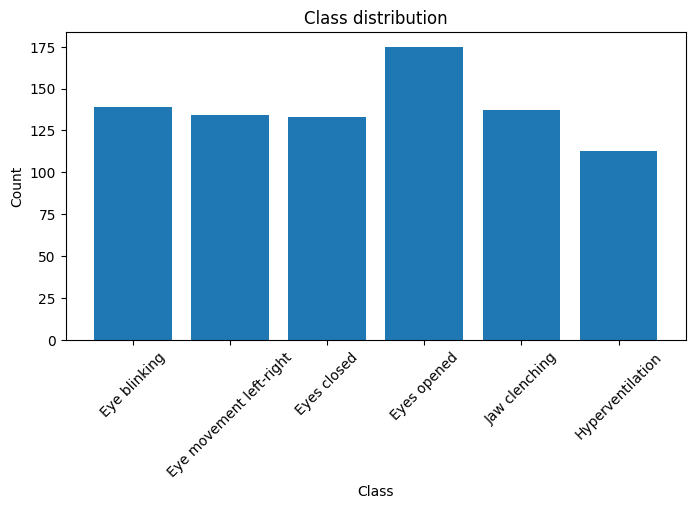

In [32]:
import matplotlib.pyplot as plt

# count the occurrence of each class
unique, counts = np.unique(y, return_counts=True)

# create bar chart
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(unique, counts, align='center')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class distribution')


ax.set_xticks(unique)
ax.set_xticklabels(braincapture_annotations.keys(), rotation=45)

plt.show()

# TUAR

In [3]:
tuar_hackathon_path = data_folder + 'hackathon 01/TUAR/01_tcp_ar/'

tuar_folders = os.listdir(tuar_hackathon_path)
len(tuar_folders)

200

In [4]:
subject = 'S001'
session = 'R05'
token = 't000'

example_file = tuar_hackathon_path + f'{subject}/{subject}{session}_{token}.edf'

raw = get_raw(example_file, hackathon, standard_19_channel)
raw

<RawArray | 20 x 369152 (1442.0 s), ~56.4 MB, data loaded>

In [5]:
data_dict = load_data_dict(data_folder_path=tuar_hackathon_path, channel_picks=hackathon, channel_order=standard_19_channel, annotation_dict=tuh_eeg_artefact_annotations, tmin=-0.5, tlen=5, labels=True)

  0%|          | 0/200 [00:00<?, ?it/s]

['eyem' 'eyem' 'eyem']
(array([[ 5881,     0,     0],
       [35020,     0,     0],
       [37123,     0,     0]]), {'eyem': 0})
[[ 5881     0     0]
 [35020     0     0]
 [37123     0     0]]
Using data from preloaded Raw for 3 events and 1281 original time points ...
0 bad epochs dropped
['musc_elec' 'musc_elec' 'musc' 'eyem_musc' 'elec' 'eyem_musc' 'eyem_musc'
 'elec' 'eyem_musc' 'musc_elec' 'eyem_musc' 'eyem_musc' 'musc_elec' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc_elec' 'eyem' 'elec' 'eyem'
 'eyem_musc' 'eyem' 'musc' 'eyem' 'elec' 'eyem' 'eyem_musc' 'musc'
 'eyem_musc' 'elec' 'musc_elec' 'musc' 'musc' 'musc_elec' 'eyem' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem'
 'elpp' 'elec' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc'
 'eyem_musc' 'eyem' 'eyem_musc' 'eyem_musc' 'elec' 'eyem' 'elec'
 'eyem_musc' 'musc' 'musc' 'eyem' 'elec' 'eyem_musc' 'elec' 'eyem' 'elec'
 'el

  0%|          | 1/200 [00:02<09:03,  2.73s/it]

['eyem' 'eyem' 'eyem' 'eyem']
(array([[368110,      0,      0],
       [368116,      0,      0],
       [368123,      0,      0],
       [368127,      0,      0]]), {'eyem': 0})
[[368110      0      0]
 [368116      0      0]
 [368123      0      0]
 [368127      0      0]]
Using data from preloaded Raw for 4 events and 1281 original time points ...
0 bad epochs dropped


  1%|          | 2/200 [00:04<06:38,  2.01s/it]

['eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec']
(array([[ 62482,      0,      2],
       [ 80391,      0,      2],
       [ 88737,      0,      2],
       [148946,      0,      3],
       [148950,      0,      3],
       [148974,      0,      3],
       [148982,      0,      3],
       [162072,      0,      3],
       [162089,      0,      3],
       [162114,      0,      3],
       [162126,      0,      3],
       [166312,      0,      3],
       [166346,      0,      3],
       [166365,      0,      3],
       [166380,      0,      3],
       [174649,      0,      3],
       [174680,      0,      3],
       [174686,      0,      3],
       [174703,      0,      3]]), {'elec': 3, 'musc': 2})
[[ 62482      0      2]
 [ 80391      0      2]
 [ 88737      0      2]
 [148946      0      3]
 [148950      0      3]
 [148974      0      3]
 [148982      0  

  2%|▏         | 3/200 [00:05<05:30,  1.68s/it]

['elec' 'musc' 'musc_elec' 'musc' 'musc_elec' 'musc_elec' 'musc_elec'
 'musc_elec' 'elec' 'musc_elec' 'elec' 'musc_elec' 'elec' 'musc_elec'
 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec'
 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec'
 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec'
 'musc_elec']
(array([[    0,     0,     3],
       [ 2477,     0,     2],
       [35282,     0,     2],
       [80170,     0,     3],
       [80495,     0,     3],
       [82427,     0,     3]]), {'elec': 3, 'musc': 2})
[[    0     0     3]
 [ 2477     0     2]
 [35282     0     2]
 [80170     0     3]
 [80495     0     3]
 [82427     0     3]]
Using data from preloaded Raw for 6 events and 1281 original time points ...
1 bad epochs dropped


  2%|▏         | 4/200 [00:06<04:09,  1.27s/it]

['musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc']
(array([[ 15293,      0,      2],
       [ 20238,      0,      0],
       [ 27129,      0,      0],
       [ 27895,      0,      0],
       [ 27958,      0,      0],
       [100347,      0,      0],
       [161899,      0,      0],
       [161900,      0,      0],
       [170162,      0,      2],
       [170831,      0,      2],
       [170880,      0,      2],
       [170887,      0,      2],
       [195429,      0,      2],
       [204481,      0,      2],
       [204515,      0,      2],
       [204518,      0,      2],
       [204525,      0,      2],
       [204793,      0,      2],
       [209381,      0,      2],
       [212219,      0,      2],
       [212230,      0,      2],
       [212938,      0,      2],
       [212954,      0,      2],
       [218873,      0,   

  2%|▎         | 5/200 [00:07<04:23,  1.35s/it]

['elec']
(array([[40961,     0,     3]]), {'elec': 3})
[[40961     0     3]]
Using data from preloaded Raw for 1 events and 1281 original time points ...
0 bad epochs dropped
['elec' 'eyem' 'eyem' 'eyem']
(array([[36104,     0,     3],
       [40185,     0,     0],
       [40187,     0,     0],
       [40190,     0,     0]]), {'elec': 3, 'eyem': 0})
[[36104     0     3]
 [40185     0     0]
 [40187     0     0]
 [40190     0     0]]
Using data from preloaded Raw for 4 events and 1281 original time points ...
0 bad epochs dropped
['elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc']
(array([[ 1024,     0,     3],
       [ 6003,     0,     3],
       [ 6967,     0,     3],
       [ 7948,     0,     3],
       [ 9271,     0,     0],
       [ 9275,     0,     0],
       [ 9320,     0,     0],
       [ 9333,     0,     0],
       [16182,     0,     3],
       [23319,     0,     3]]), {'elec': 3, 'eyem': 0})
[[ 1024     0    

  3%|▎         | 6/200 [00:09<04:55,  1.52s/it]

['musc' 'eyem' 'eyem' 'eyem_musc' 'musc' 'musc']
(array([[  8824,      0,      2],
       [ 16104,      0,      0],
       [ 18233,      0,      0],
       [245450,      0,      2],
       [297692,      0,      2]]), {'eyem': 0, 'musc': 2})
[[  8824      0      2]
 [ 16104      0      0]
 [ 18233      0      0]
 [245450      0      2]
 [297692      0      2]]
Using data from preloaded Raw for 5 events and 1281 original time points ...
0 bad epochs dropped


  4%|▎         | 7/200 [00:10<04:37,  1.44s/it]

['musc_elec' 'eyem_musc' 'eyem' 'eyem' 'musc_elec' 'musc_elec' 'chew'
 'elec' 'elec' 'chew' 'chew' 'chew' 'chew' 'eyem_elec' 'musc' 'eyem_elec'
 'eyem_elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc' 'musc' 'eyem' 'musc' 'eyem' 'musc' 'elec' 'eyem' 'eyem' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'eyem' 'elec' 'elec' 'elec' 'eyem' 'elec' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem']
(array([[  2640,      0,      0],
       [  3227,      0,      0],
       [ 25321,      0,      1],
       [ 26396,      0,      3],
       [ 26463,      0,      3],
       [ 26897,      0,      1],
       [ 26898,      0,      1],
       [ 26900,      0,      1],
       [ 26937,      0,      1],
       [ 30207,      0,      2],
       [ 60686,      0,      3],
       [ 60774,      0,      3],
       [ 60954,      0,      0],
       [ 62286,      0,      0],
       [ 63876,      0,   

  4%|▍         | 8/200 [00:14<06:50,  2.14s/it]

['elec' 'eyem' 'eyem' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'musc_elec' 'musc' 'eyem_musc' 'musc' 'musc_elec' 'musc' 'musc'
 'musc_elec' 'eyem' 'eyem' 'musc']
(array([[     1,      0,      3],
       [  2161,      0,      0],
       [  3482,      0,      0],
       [  3721,      0,      2],
       [  3901,      0,      2],
       [ 74434,      0,      0],
       [ 75252,      0,      0],
       [ 76031,      0,      0],
       [ 77008,      0,      0],
       [113921,      0,      2],
       [132564,      0,      2],
       [133164,      0,      2],
       [187096,      0,      2],
       [247730,      0,      2],
       [264411,      0,      0],
       [265186,      0,      0],
       [316780,      0,      2]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[     1      0      3]
 [  2161      0      0]
 [  3482      0      0]
 [  3721      0      2]
 [  3901      0      2]
 [ 74434      0      0]
 [ 75252      0      0]
 [ 76031      0      0]
 [ 77008      0      0]
 [113921      

  4%|▍         | 9/200 [00:15<06:07,  1.92s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'musc'
 'musc' 'eyem_elec' 'eyem_elec' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'musc' 'eyem_musc' 'elec' 'eyem' 'eyem']
(array([[ 25510,      0,      0],
       [ 26365,      0,      0],
       [ 26368,      0,      0],
       [ 30725,      0,      0],
       [ 35054,      0,      0],
       [ 39524,      0,      2],
       [ 52570,      0,      2],
       [ 55745,      0,      2],
       [ 70020,      0,      0],
       [ 84223,      0,      2],
       [ 84225,      0,      2],
       [ 84736,      0,      2],
       [ 96993,      0,      2],
       [ 97276,      0,      2],
       [126439,      0,      0],
       [215066,      0,      0],
       [220256,      0,      0],
       [231407,      0,      0],
       [246851,      0,      2],
       [252589,      0,      3],
       [338417,      0,      0],
       [338422,      0,      0]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[ 25510      0      0]
 [ 26365      0   

  5%|▌         | 10/200 [00:17<05:35,  1.77s/it]

['eyem_elec' 'musc' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc_elec' 'musc' 'musc' 'musc' 'musc_elec'
 'eyem_musc' 'eyem_musc' 'musc' 'eyem_elec' 'musc' 'eyem_musc' 'eyem_musc'
 'eyem' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc'
 'musc_elec' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'musc_elec' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'musc_elec' 'musc_elec' 'eyem_musc' 'musc' 'elec' 'elec' 'eyem_musc'
 'eyem_musc' 'elec' 'eyem_musc' 'elec' 'elec' 'elec' 'eyem_musc'
 'musc_elec' 'musc_elec' 'eyem_musc' 'musc_elec' 'eyem' 'eyem' 'eyem_musc'
 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem_musc'
 'eyem' 'musc' 'eyem_elec' 'eyem' 'elec' 'musc' 'eyem' 'eyem' 'musc_elec'
 'musc_elec' 'musc_elec' 'musc_elec' 'eyem' 'musc' 'eyem' 'eyem_elec'
 'musc' 'ey

  6%|▌         | 11/200 [00:18<05:12,  1.65s/it]

['musc' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem']
(array([[ 18635,      0,      2],
       [ 19467,      0,      0],
       [ 20466,      0,      0],
       [ 86034,      0,      2],
       [ 86040,      0,      2],
       [ 86042,      0,      2],
       [ 86049,      0,      2],
       [208402,      0,      0],
       [284498,      0,      0]]), {'eyem': 0, 'musc': 2})
[[ 18635      0      2]
 [ 19467      0      0]
 [ 20466      0      0]
 [ 86034      0      2]
 [ 86040      0      2]
 [ 86042      0      2]
 [ 86049      0      2]
 [208402      0      0]
 [284498      0      0]]
Using data from preloaded Raw for 9 events and 1281 original time points ...
0 bad epochs dropped


  6%|▌         | 12/200 [00:20<04:55,  1.57s/it]

['musc' 'musc' 'musc' 'musc']
(array([[    6,     0,     2],
       [32412,     0,     2],
       [32754,     0,     2],
       [35783,     0,     2]]), {'musc': 2})
[[    6     0     2]
 [32412     0     2]
 [32754     0     2]
 [35783     0     2]]
Using data from preloaded Raw for 4 events and 1281 original time points ...
1 bad epochs dropped


  6%|▋         | 13/200 [00:20<03:45,  1.20s/it]

['eyem' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem_musc' 'elec' 'eyem' 'elec' 'eyem' 'eyem_musc' 'eyem'
 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc'
 'eyem' 'eyem_musc' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'elec' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'musc' 'musc' 'musc' 'musc' 'eyem'
 'elec' 'elec' 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem'
 'eyem_musc' 'elec' 'eyem' 'eyem' 'eyem_musc' 'musc' 'eyem_musc'
 'eyem_musc' 'musc' 

  7%|▋         | 14/200 [00:23<05:36,  1.81s/it]

['elec' 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'eyem' 'musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc']
(array([[  4121,      0,      3],
       [  4139,      0,      3],
       [  9632,      0,      3],
       [ 31377,      0,      3],
       [ 32775,      0,      3],
       [ 33579,      0,      0],
       [ 33775,      0,      2],
       [ 59696,      0,      2],
       [ 60328,      0,      2],
       [ 82574,      0,      2],
       [152521,      0,      2]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[  4121

  8%|▊         | 15/200 [00:25<05:22,  1.74s/it]

['elec' 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'elec' 'elec' 'elec']
(array([[     3,      0,      3],
       [ 34305,      0,      3],
       [ 69890,      0,      3],
       [180571,      0,      3],
       [256512,      0,      3],
       [329215,      0,      3]]), {'elec': 3})
[[     3      0      3]
 [ 34305      0      3]
 [ 69890      0      3]
 [180571      0      3]
 [256512      0      3]
 [329215      0      3]]
Using data from preloaded Raw for 6 events and 1281 original time points ...
1 bad epochs dropped


  8%|▊         | 16/200 [00:26<05:00,  1.64s/it]

['eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'eyem'
 'elec' 'elec' 'elec' 'eyem' 'musc' 'musc' 'elec' 'elec' 'eyem' 'elec'
 'elec' 'elec' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc' 'musc' 'eyem' 'elec' 'elec' 'musc' 'musc' 'eyem' 'eyem' 'elec'
 'eyem' 'chew' 'eyem_musc' 'musc' 'chew' 'chew' 'eyem_chew' 'eyem_chew'
 'eyem_chew' 'chew' 'chew' 'chew' 'chew' 'eyem_chew' 'eyem_chew' 'chew'
 'chew' 'chew' 'eyem_chew' 'chew' 'chew' 'eyem' 'musc' 'musc' 'elec'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'chew'
 'chew' 'chew' 'eyem' 'chew' 'chew' 'elec' 'elec' 'eyem_musc' 'eyem'
 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem_musc' 'chew' 'chew' 'eyem'
 'chew' 'eyem' 'chew' 'chew' 'chew' 'chew' 'eyem' 'eyem' 'chew' 'chew'
 'chew' 'chew' 'eyem' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'eyem'
 'elec' 'elec' 'elec' 'eyem' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'm

  8%|▊         | 17/200 [00:30<07:11,  2.36s/it]

['elec' 'eyem' 'elec' 'eyem' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'musc' 'eyem_musc' 'eyem' 'eyem_musc' 'musc' 'musc' 'elec'
 'musc_elec' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem_musc'
 'musc' 'musc' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem_musc' 'musc' 'elec'
 'elec' 'eyem_musc' 'musc' 'eyem' 'eyem_musc' 'eyem_musc' 'musc' 'eyem'
 'eyem_musc' 'musc' 'eyem' 'eyem_musc' 'musc' 'eyem' 'eyem_musc'
 'eyem_musc' 'musc' 'eyem' 'eyem_musc' 'musc' 'musc' 'musc' 'elec' 'eyem'
 'eyem_musc' 'musc' 'musc' 'eyem' 'eyem_musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'eyem' 'elec' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc'
 'eyem' 'musc' 'musc' 'elec' 'musc' 'elec' 'chew_musc' 'elec']
(array([[    56,      0,      3],
       [  2991,      0,      0],
       [  6679,      0,      3],
       [ 19302,      0,      0],
       [ 20518,      0,      2],
       [ 27453,      0,      2],
       [ 27537,      0,      2],
       [ 28124,      0,      2],
       [ 28501,      0,      2]

  9%|▉         | 18/200 [00:32<06:33,  2.16s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'musc' 'musc']
(array([[ 13419,      0,      0],
       [ 14185,      0,      0],
       [ 16094,      0,      0],
       [ 16107,      0,      0],
       [ 16745,      0,      0],
       [ 17984,      0,      0],
       [ 18688,      0,      0],
       [ 20267,      0,      0],
       [ 22626,      0,      0],
       [ 30101,      0,      0],
       [ 31543,      0,      0],
       [ 33109,      0,      0],
       [ 34780,      0,      0],
       [ 36533,      0,      0],
       [ 37613,      0,      0],
       [ 38426,      0,      0],
       [ 39524,      0,      

 10%|▉         | 19/200 [00:33<05:56,  1.97s/it]

['elec' 'elec' 'musc' 'musc_elec' 'musc' 'musc_elec' 'musc' 'musc_elec'
 'musc' 'musc_elec' 'elec' 'musc' 'elec' 'musc' 'musc_elec' 'musc'
 'musc_elec' 'musc' 'musc_elec' 'eyem' 'musc' 'musc' 'musc' 'musc' 'eyem'
 'elec' 'musc_elec' 'elec' 'elec' 'musc_elec' 'eyem' 'elec' 'musc_elec'
 'musc_elec' 'elec' 'musc' 'elec' 'musc' 'elec' 'elec']
(array([[     2,      0,      3],
       [  3728,      0,      3],
       [ 12032,      0,      2],
       [ 18430,      0,      2],
       [ 28119,      0,      2],
       [ 33795,      0,      2],
       [ 39700,      0,      3],
       [ 44736,      0,      2],
       [ 48473,      0,      3],
       [ 52861,      0,      2],
       [ 62462,      0,      2],
       [ 70366,      0,      2],
       [ 75639,      0,      0],
       [ 84929,      0,      2],
       [ 92811,      0,      2],
       [101817,      0,      2],
       [108922,      0,      2],
       [115846,      0,      0],
       [125083,      0,      3],
       [127349,      0,      3]

 10%|█         | 20/200 [00:34<05:01,  1.68s/it]

['elec' 'elec' 'elec' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec'
 'musc_elec' 'elec' 'elec' 'musc_elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'musc_elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elpp' 'eyem_musc'
 'elec' 'elec' 'eyem' 'elec' 'eyem' 'elec' 'elec' 'eyem_elec' 'eyem'
 'eyem_elec' 'eyem_elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'elec'
 'elec' 'eyem' 'elec' 'elec' 'elec' 'elec' 'musc' 'musc_elec' 'elec'
 'elec' 'elec' 'eyem' 'elec' 'musc_elec' 'eyem_elec' 'elec' 'elec' 'elec'
 'eyem_elec' 'musc_elec' 'elec']
(array([[  1281,      0,      3],
       [  4356,      0,      3],
       [  4697,      0,      3],
       [  5249,      0,      2],
       [  6158,      0,      3],
       [  6553,      0,      3],
       [  6574,      0,      3],
       [  7855,      0,      3],
       [  7867,      0,      3],
       [ 10864,      0,      3],
       [ 12037,      0,      3],
       [ 28978,      0,      3],
       [ 31311,      0,      3],
       [ 31895,      0,      3],
      

 10%|█         | 21/200 [00:35<04:15,  1.43s/it]

['elec']
(array([[0, 0, 3]]), {'elec': 3})
[[0 0 3]]
Using data from preloaded Raw for 1 events and 1281 original time points ...
1 bad epochs dropped


 11%|█         | 22/200 [00:35<03:09,  1.06s/it]

['elec' 'eyem' 'eyem' 'eyem' 'eyem_elec' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem_elec' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'elec' 'eyem_elec' 'elec'
 'eyem' 'eyem' 'elec' 'elec' 'eyem_elec' 'elec' 'eyem' 'elec' 'eyem'
 'elec' 'elec' 'elec' 'eyem' 'elec' 'eyem_elec' 'eyem_elec' 'eyem' 'eyem'
 'eyem_elec' 'eyem_elec' 'elec' 'elec' 'elec' 'eyem_elec' 'chew'
 'eyem_elec' 'chew' 'eyem_elec' 'chew']
(array([[   27,     0,     3],
       [  241,     0,     0],
       [ 1338,     0,     0],
       [ 1911,     0,     0],
       [ 4187,     0,     3],
       [ 4374,     0,     0],
       [ 4750,     0,     0],
       [ 5643,     0,     0],
       [ 6162,     0,     0],
       [ 7429,     0,     0],
       [ 9679,     0,     0],
       [10142,     0,     3],
       [10144,     0,     3],
       [10678,     0,     0],
       [12288,     0,     0],
       [13006,     0,     0],
       [13381,     0,     0],
       [13975,     0,     0],
    

 12%|█▏        | 23/200 [00:36<02:50,  1.04it/s]

['eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'elec' 'elec'
 'elec' 'musc_elec' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem']
(array([[   510,      0,      0],
       [ 10498,      0,      0],
       [ 17919,      0,      0],
       [ 23549,      0,      0],
       [ 56700,      0,      2],
       [ 61952,      0,      2],
       [ 71275,      0,      3],
       [ 71946,      0,      3],
       [ 73592,      0,      3],
       [182977,      0,      0],
       [265997,      0,      0],
       [275588,      0,      0],
       [275815,      0,      3],
       [291662,      0,      3],
       [299357,      0,      0]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[   510      0      0]
 [ 10498      0      0]
 [ 17919      0      0]
 [ 23549      0      0]
 [ 56700      0      2]
 [ 61952      0      2]
 [ 71275      0      3]
 [ 71946      0      3]
 [ 73592      0      3]
 [182977      0      0]
 [265997      0      0]
 [275588      0      0]
 [275815      0      3]
 [291662      0      3]

 12%|█▏        | 24/200 [00:38<03:14,  1.11s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_elec' 'eyem' 'eyem'
 'musc' 'eyem' 'eyem' 'eyem_elec' 'eyem' 'eyem_musc' 'musc_elec' 'eyem'
 'eyem']
(array([[   568,      0,      0],
       [  1985,      0,      0],
       [  2322,      0,      0],
       [  4184,      0,      0],
       [  4613,      0,      0],
       [  6046,      0,      0],
       [  6571,      0,      0],
       [  7021,      0,      0],
       [  7304,      0,      0],
       [  8170,      0,      0],
       [  8988,      0,      0],
       [ 11263,      0,      0],
       [ 13311,      0,      0],
       [ 32002,      0,      0],
       [ 33278,      0,      0],
       [ 39170,      0,      0],
       [ 44292,      0,      0],
       [ 47979,      0,      0],
       [ 55157,      0,      0],
       [ 58531,      0,      3],
       [ 60163,      0,      0],
       [ 67506

 12%|█▎        | 25/200 [00:40<04:11,  1.43s/it]

['elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec'
 'eyem' 'elec' 'musc' 'eyem_musc' 'eyem' 'musc' 'musc' 'eyem_musc' 'eyem'
 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'elec' 'musc'
 'eyem' 'elec' 'eyem' 'elec' 'elec' 'elec' 'eyem' 'musc' 'elec' 'elec'
 'elec' 'chew' 'elec' 'elec']
(array([[  8200,      0,      3],
       [ 13686,      0,      0],
       [ 15179,      0,      0],
       [ 26713,      0,      0],
       [ 27492,      0,      0],
       [ 28369,      0,      0],
       [ 28929,      0,      0],
       [ 29664,      0,      0],
       [ 43807,      0,      3],
       [ 65830,      0,      3],
       [ 84223,      0,      0],
       [ 85448,      0,      3],
       [ 85700,      0,      2],
       [ 86354,      0,      0],
       [ 866

 13%|█▎        | 26/200 [00:41<04:01,  1.39s/it]

['musc' 'eyem' 'elec' 'chew' 'musc' 'chew' 'musc' 'chew' 'chew' 'musc'
 'chew' 'musc' 'eyem' 'eyem' 'chew' 'eyem_elec' 'eyem_elec' 'eyem_musc'
 'chew' 'chew' 'eyem_chew' 'chew' 'eyem_chew' 'eyem_chew' 'chew'
 'eyem_chew' 'chew' 'eyem_chew' 'chew' 'elec' 'musc' 'eyem' 'eyem_chew'
 'chew' 'elec' 'elec' 'chew' 'chew' 'chew' 'musc' 'musc' 'chew' 'musc'
 'chew' 'musc' 'chew' 'chew' 'chew' 'musc' 'chew' 'musc' 'chew' 'elec'
 'chew' 'shiv' 'eyem_shiv' 'eyem_musc' 'eyem_chew' 'eyem_musc' 'musc'
 'chew' 'eyem' 'eyem_musc' 'chew' 'eyem_musc' 'chew' 'eyem_musc' 'chew'
 'eyem_musc' 'chew' 'eyem_musc' 'chew' 'chew' 'eyem_chew' 'eyem_musc'
 'eyem_chew' 'eyem_musc' 'chew' 'eyem_musc' 'chew' 'eyem_musc' 'eyem_chew'
 'musc_elec' 'musc' 'eyem_musc' 'musc' 'chew' 'musc' 'eyem_shiv' 'musc'
 'chew' 'musc' 'elec' 'musc' 'chew' 'eyem_chew' 'chew' 'eyem_musc' 'chew'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'elec' 'eyem' 'eyem' 'eyem_elec'
 'elec' 'eyem' 'eyem_elec' 'eyem' 'eyem' 'eyem_elec' 'eyem_elec' 'eyem'
 

 14%|█▎        | 27/200 [00:43<04:12,  1.46s/it]

['eyem' 'elec' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'musc'
 'eyem_musc' 'eyem' 'elec' 'musc' 'musc_elec' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'musc_elec' 'musc_elec' 'musc_elec' 'musc' 'musc_elec'
 'elec' 'elec' 'elec' 'musc' 'musc_elec' 'musc_elec' 'musc' 'musc_elec'
 'eyem']
(array([[  6651,      0,      0],
       [  7531,      0,      3],
       [ 17944,      0,      0],
       [ 18316,      0,      3],
       [ 19305,      0,      3],
       [ 31245,      0,      0],
       [ 51469,      0,      0],
       [ 53593,      0,      0],
       [ 57191,      0,      0],
       [ 63357,      0,      0],
       [ 78565,      0,      0],
       [ 79558,      0,      0],
       [ 81437,      0,      0],
       [ 84233,      0,      0],
       [ 87316,      0,  

 14%|█▍        | 28/200 [00:45<05:18,  1.85s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'elec' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_elec' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem_musc' 'eyem' 'musc' 'musc' 'eyem' 'eyem' 'musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem']
(array([[     3,      0,      0],
       [  5904,      0,      0],
       [  9321,      0,      0],
       [ 24839,      0,      0],
       [ 26754,      0,      0],
       [ 30841,      0,      0],
       [ 32524,      0,      0],
       [ 34562,      0,      0],
       [ 36153,      0,      0],
       [ 36855,      0,      3],
       [ 36860,      0,      3],
       [ 36863,      0,      3],
       [ 37892,      0

 14%|█▍        | 29/200 [00:47<04:52,  1.71s/it]

['eyem' 'elec' 'eyem' 'elec' 'elec' 'elec' 'musc' 'elec' 'eyem_elec'
 'eyem' 'musc' 'musc' 'eyem_elec' 'eyem' 'elec']
(array([[ 13588,      0,      0],
       [ 48893,      0,      3],
       [ 67361,      0,      0],
       [129574,      0,      3],
       [137616,      0,      3],
       [138021,      0,      3],
       [166625,      0,      2],
       [211711,      0,      3],
       [212108,      0,      0],
       [236348,      0,      2],
       [238082,      0,      2],
       [269836,      0,      0],
       [272450,      0,      3]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[ 13588      0      0]
 [ 48893      0      3]
 [ 67361      0      0]
 [129574      0      3]
 [137616      0      3]
 [138021      0      3]
 [166625      0      2]
 [211711      0      3]
 [212108      0      0]
 [236348      0      2]
 [238082      0      2]
 [269836      0      0]
 [272450      0      3]]
Using data from preloaded Raw for 13 events and 1281 original time points ...
0 bad epochs dropped


 15%|█▌        | 30/200 [00:48<04:41,  1.65s/it]

['musc' 'musc' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'eyem_musc'
 'musc' 'elec' 'eyem' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem' 'eyem' 'elec' 'eyem_musc'
 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_elec'
 'eyem_elec' 'musc_elec' 'eyem' 'eyem_elec' 'eyem' 'eyem_musc' 'musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem_musc'
 'eyem' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem' 'elec' 'eyem'
 'eyem' 'eyem' 'musc' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem'
 'eyem_elec' 'eyem' 'eyem' 'elec']
(array([[  5879,      0,      2],
      

 16%|█▌        | 31/200 [00:51<05:46,  2.05s/it]

['elec' 'musc' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc'
 'elec' 'eyem' 'musc_elec' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'musc_elec' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem'
 'elec' 'eyem' 'elec' 'elec' 'eyem_musc' 'eyem' 'eyem' 'elec' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'musc' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem'
 'eyem' 'musc' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem_musc'
 'musc' 'elec' 'eyem']
(array([[  1067,      0,      3],
       [  2309,      0,      2],
       [  5868,      0,      0],
       [  6173,      0,      3],
       [  9458,      0,      0],
       [ 14365,      0,      0],
       [ 16676,      0,      0],
       [ 21695,      0,      3],
       [ 

 16%|█▌        | 32/200 [00:53<05:14,  1.87s/it]

['musc' 'musc']
(array([[   0,    0,    2],
       [2701,    0,    2]]), {'musc': 2})
[[   0    0    2]
 [2701    0    2]]
Using data from preloaded Raw for 2 events and 1281 original time points ...
1 bad epochs dropped


 16%|█▋        | 33/200 [00:54<04:48,  1.73s/it]

['eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem']
(array([[   153,      0,      0],
       [ 18193,      0,      0],
       [ 35599,      0,      0],
       [ 43225,      0,      0],
       [ 53257,      0,      0],
       [ 61355,      0,      0],
       [ 69933,      0,      0],
       [112177,      0,      0],
       [118590,      0,      0],
       [120073,      0,      0],
       [125155,      0,      0],
       [126655,      0,      0],
       [132354,      0,      0],
       [133378,      0,      0],
       [138315,      0,      0],
       [142504,      0,      0],
       [156418,      0,      0],
       [161607,      0,      0],
       [165142,      0,      0],
       [212554,      0,      0],
       [249217,      0,      0],
       [255793,      0,      0],
       

 17%|█▋        | 34/200 [00:56<04:32,  1.64s/it]

['musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'eyem_elec' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_m

 18%|█▊        | 35/200 [00:57<04:16,  1.55s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_chew' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem_chew' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem_musc' 'eyem_chew' 'eyem' 'musc' 'eyem']
(array([[     0,      0,      0],
       [  8011,      0,      0],
       [ 11520,      0,      0],
       [ 12799,      0,      0],
       [ 18687,      0,      0],
       [ 25925,      0,      0],
       [ 27162,      0,      0],
  

 18%|█▊        | 36/200 [00:58<04:09,  1.52s/it]

['eyem' 'eyem' 'elec' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'elec' 'musc_elec' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'eyem' 'eyem_elec' 'elec' 'eyem' 'elec' 'eyem' 'eyem_elec' 'eyem'
 'elec' 'eyem' 'musc' 'elec' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_elec' 'eyem' 'eyem' 'musc_elec' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem_musc' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem_musc' 'musc' 'eyem' 'eyem_elec' 'eyem_musc'
 'eyem_elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec'
 'eyem_musc' 'eyem' 'eyem_elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc_elec' 'eyem' 'eyem' 'musc_elec' 'musc_elec' 'eyem_musc' 'musc'
 'musc' 'musc_elec' 'eyem_musc' 'musc' 'elec' 'eyem_elec' 'eyem' 'elec'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'elec'
 'elec']
(array(

 18%|█▊        | 37/200 [01:00<04:02,  1.49s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'musc' 'eyem_elec' 'eyem'
 'elec' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem']
(array([[  2565,      0,      0],
       [  8335,      0,      0],
       [  9726,      0,      0],
       [ 11469,      0,      0],
       [ 22531,      0,      0],
       [ 25583,      0,      0],
       [ 26870,      0,      0],
       [ 28843,      0,      0],
       [ 30520,      0,      0],
       [ 32767,      0,      0],
       [ 38102,      0,      0],
       [ 40847,      0,      0],
       [ 45308,      0,      0],
       [ 50567,      0,      0],
       [ 58144,      0,      3],
       [ 58248,      0,      3],
       [ 60789,      0,      2],
       [ 61477,      0,    

 19%|█▉        | 38/200 [01:01<04:00,  1.49s/it]

['eyem_chew' 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'eyem_musc' 'elec'
 'eyem_musc' 'elec' 'elec' 'elec' 'eyem_musc' 'elec' 'eyem_musc'
 'eyem_musc' 'elec' 'elec' 'elec' 'eyem_musc' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec']
(array([[152837,      0,      3],
       [154673,      0,      3],
       [156730,      0,      3],
       [160253,      0,      3],
       [171814,      0,      3],
       [177809,      0,      3],
       [216247,      0,      3],
       [234578,      0,      3],
       [234869,      0,      3],
       [235171,      0,      3],
       [258954,      0,      3],
       [316057,      0,      3],
       [354206,      0,      3],
       [359247,      0,      3],
       [361079,      0,      3],
       [383340,      0,      3],
       [386457,      0,      3],
       [407539,      0,      3],
       [412682,      0,      3],
       [416324,     

 20%|█▉        | 39/200 [01:04<04:42,  1.76s/it]

['elec' 'musc' 'eyem' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'eyem'
 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc'
 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'elec' 'eyem' 'musc' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'elec' 'musc_elec' 'elec' 'elec' 'elec' 'musc_elec' 'elec' 'elec' 'elec'
 'musc_elec' 'elec' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem' 'eyem_musc'
 'musc' 'musc' 'musc' 'musc_elec' 'eyem_musc' 'musc' 'elec' 'eyem' 'musc'
 'musc' 'eyem' 'eyem_musc' 'musc' 'musc' 'musc_elec' 'elec' 'musc'
 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem'
 'eyem' 'ele

 20%|██        | 40/200 [01:06<05:27,  2.05s/it]

['elec' 'eyem' 'eyem' 'eyem' 'musc_elec' 'musc_elec' 'musc_elec'
 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec'
 'musc_elec' 'elec' 'musc' 'elec' 'eyem' 'musc_elec' 'musc_elec'
 'musc_elec' 'elec' 'musc_elec' 'musc_elec' 'elec' 'elec' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'eyem_musc' 'elec' 'musc_elec'
 'eyem' 'elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'elec'
 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'eyem'
 'elec' 'musc_elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'eyem_musc'
 'eyem_musc' 'elec' 'musc' 'eyem_musc' 'eyem_musc' 'musc_elec' 'eyem_musc'
 'elec' 'eyem' 'eyem_musc' 'musc_elec' 'eyem_musc' 'musc' 'chew'
 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc'
 'chew' 'eyem_musc' 'eyem_musc' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'musc' 'eyem_mu

 20%|██        | 41/200 [01:09<05:47,  2.18s/it]

['chew' 'eyem' 'eyem' 'eyem' 'eyem' 'chew' 'eyem' 'chew' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem_chew' 'chew' 'chew' 'eyem' 'eyem' 'chew' 'eyem'
 'eyem' 'eyem' 'chew' 'eyem' 'eyem' 'eyem' 'chew' 'eyem' 'eyem' 'eyem'
 'eyem_chew' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'chew'
 'chew' 'chew_musc' 'chew' 'chew' 'chew' 'musc' 'chew' 'chew' 'musc'
 'chew_musc' 'chew_musc' 'chew' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'chew' 'chew' 'chew' 'chew_musc' 'musc' 'eyem' 'musc' 'musc'
 'musc' 'elec' 'eyem' 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem_musc'
 'eyem_musc' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'elec' 'elec' 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'musc_elec'
 'eyem_musc']
(array([[   62,     0,     1],
       [ 1333,     0,     0],
       [ 1336,     0,     0],
       [ 1343,     0,     0],
       [ 1345,     0,  

 21%|██        | 42/200 [01:11<05:26,  2.06s/it]

['elec' 'musc_elec' 'musc' 'eyem' 'chew' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'chew' 'eyem' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'elec'
 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'chew' 'musc' 'musc'
 'eyem' 'elec' 'elec' 'eyem']
(array([[     0,      0,      3],
       [  3256,      0,      2],
       [  7494,      0,      0],
       [  8428,      0,      1],
       [ 37356,      0,      0],
       [ 37365,      0,      0],
       [ 37375,      0,      0],
       [ 37380,      0,      0],
       [ 39243,      0,      0],
       [ 41120,      0,      0],
       [ 65743,      0,      3],
       [ 65762,      0,      3],
       [ 76476,      0,      0],
       [ 84308,      0,      1],
       [ 86332,      0,      0],
       [ 87296,      0,      2],
       [ 87300,  

 22%|██▏       | 43/200 [01:12<04:55,  1.88s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'eyem' 'musc' 'eyem'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'musc' 'elec' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec'
 'elec']
(array([[ 11747,      0,      0],
       [ 11756,      0,      0],
       [ 11784,      0,      0],
       [ 12785,      0,      0],
       [ 12795,      0,      0],
       [ 19105,      0,      2],
       [ 19114,      0,      2],
       [ 19128,      0,      0],
       [ 19138,      0,      2],
       [ 19138,      0,      0],
       [ 19142,      0,      2],
       [ 19171,      0,      0],
       [ 19176,      0,      0],
       [ 23243,      0,      0],
       [ 26747,      0,      0],
       [ 30379,      0,      0],
       [ 32974,      0,      0],
       [ 69674,      0,      0],
       [ 69683,      0,      0],
       [ 69693,      0,      0],
       [ 69702,      0,      0],
       [101568,      0,      2],
       [162316,      0,      3],
       [190681,   

 22%|██▏       | 44/200 [01:14<04:33,  1.75s/it]

['eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem'
 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'elec'
 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc' 'musc'
 'musc' 'musc' 'musc_elec' 'musc_elec' 'musc_elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'eyem_elec' 'elec' 'musc' 'elec' 'elec'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'musc' 'musc'
 'musc' 'elec' 'elec' 'musc' 'musc' 'musc_elec' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'elec' 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'musc' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'musc'
 'el

 22%|██▎       | 45/200 [01:19<07:08,  2.77s/it]

['elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc_elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'musc' 'eyem_musc' 'musc' 'musc'
 'eyem' 'eyem_musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'elec' 'musc' 'eyem' 'eyem' 'musc' 'elec' 'elec'
 'eyem' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem' 'musc' 'elec' 'musc'
 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem' 'eyem' 'elec' 'elec' 'elec'
 'eyem_musc' 'musc' 'elec' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem_musc'
 'eyem' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'musc' '

 24%|██▎       | 47/200 [01:22<05:19,  2.09s/it]

['elec' 'musc' 'eyem' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'elec' 'elec' 'elec' 'chew' 'chew' 'chew' 'chew' 'chew' 'chew'
 'eyem' 'eyem' 'eyem' 'eyem' 'chew' 'musc' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'chew_musc'
 'chew_musc' 'chew' 'chew' 'chew' 'chew' 'musc' 'eyem' 'musc' 'eyem'
 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem'
 'eyem' 'eyem' 

 24%|██▍       | 48/200 [01:23<04:59,  1.97s/it]

['musc' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'musc'
 'musc' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc_elec' 'musc_elec' 'elec' 'musc' 'elec' 'elec' 'musc'
 'musc' 'musc' 'musc' 'musc' 'chew' 'musc' 'musc' 'elec' 'musc' 'musc'
 'musc' 'musc' 'musc' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'chew' 'chew' 'chew' 'musc' 'musc' 'musc' 'musc'
 'elec']
(array([[ 12799,      0,      2],
       [ 12802,      0,      2],
       [ 13316,      0,      2],
       [ 24767,      0,      3],
       [ 28659,      0,      3],
       [ 30977,      0,      3],
       [ 32798,      0,      3],
       [ 40285,      0,      2],
       [ 40314,      0,      2],
       [ 41053,      0,      2],
       [ 41848,      0,      2],
       [ 41962,      0,      3],
       [ 41971,      0,      3],
       [ 42124,      0,      2],
       [ 42167,      0,      2],
       [ 44798,      0,      2],
       [ 62754,      0,      2],


 25%|██▌       | 50/200 [01:29<05:49,  2.33s/it]

['eyem_chew' 'chew' 'chew' 'chew' 'chew' 'chew' 'chew' 'chew' 'eyem_chew'
 'chew' 'eyem' 'elec' 'eyem' 'eyem' 'elec' 'eyem' 'elec' 'elec' 'eyem'
 'eyem' 'eyem_chew' 'chew' 'eyem' 'eyem' 'eyem' 'eyem_chew' 'chew' 'eyem'
 'eyem' 'eyem' 'eyem_chew' 'chew' 'eyem' 'eyem' 'eyem' 'eyem_chew' 'chew'
 'chew' 'eyem_chew' 'chew' 'eyem_chew' 'chew' 'eyem_chew' 'chew' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'chew' 'musc' 'musc'
 'eyem_chew' 'chew' 'eyem_chew' 'chew' 'musc' 'musc' 'musc' 'elec' 'elec'
 'elec' 'elec' 'eyem_chew' 'chew' 'chew' 'chew' 'eyem' 'eyem' 'eyem'
 'eyem_chew' 'chew' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'elec' 'elec' 'elec' 'eyem_chew' 'chew' 'musc' 'musc' 'musc'
 'chew' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'musc'
 'eyem_musc' 'eyem_musc' 'musc' 'eyem_chew' 'chew' 'chew' 'eyem' 'eyem'
 'eye

 26%|██▌       | 52/200 [01:32<04:42,  1.91s/it]

['musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec'
 'eyem' 'elec' 'eyem' 'elec' 'eyem' 'elec' 'eyem' 'elec' 'elec' 'elec'
 'chew' 'eyem' 'eyem' 'chew' 'elec' 'elec' 'elec' 'elec' 'elec' 'chew'
 'musc' 'eyem' 'musc' 'musc' 'elec' 'elec' 'musc' 'musc' 'elec' 'musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'elec' 'elec'
 'elec' 'elec' 'chew' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'eyem_musc' 'musc_elec' 'musc_elec' 'eyem_musc' 'musc_elec' 'eyem_musc'
 'musc' 'musc'

 26%|██▋       | 53/200 [01:34<04:22,  1.78s/it]

['elec' 'elec' 'elec' ... 'elec' 'elec' 'elec']
(array([[     9,      0,      3],
       [  1947,      0,      3],
       [  3588,      0,      3],
       ...,
       [308932,      0,      3],
       [309014,      0,      3],
       [309254,      0,      3]]), {'chew': 1, 'elec': 3, 'eyem': 0, 'musc': 2})
[[     9      0      3]
 [  1947      0      3]
 [  3588      0      3]
 ...
 [308932      0      3]
 [309014      0      3]
 [309254      0      3]]
S053 S053R01_t000 has fishy annotations, skipping...
['elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem_musc' 'musc' 'eyem' 'eyem'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc'
 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem'
 'eyem' 'eyem_musc' 'elec' 'eyem_musc' 'elec' 'elec' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'elec' 'musc' 'elec' 'musc' 'musc' 'eyem' 'eyem_musc' 'eyem

 27%|██▋       | 54/200 [01:35<04:07,  1.69s/it]

['eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem_musc']
(array([[ 9242,     0,     2],
       [ 9247,     0,     2],
       [ 9252,     0,     2],
       [ 9256,     0,     2],
       [19227,     0,     2],
       [19232,     0,     2],
       [19246,     0,     2],
       [19284,     0,     2],
       [19710,     0,     0],
       [19716,     0,     0],
       [19720,     0,     0],
       [19734,     0,     0],
       [19739,     0,     0]]), {'eyem': 0, 'musc': 2})
[[ 9242     0     2]
 [ 9247     0     2]
 [ 9252     0     2]
 [ 9256     0     2]
 [19227     0     2]
 [19232     0     2]
 [19246     0     2]
 [19284     0     2]
 [19710     0     0]
 [19716     0     0]
 [19720     0     0]
 [19734     0     0]
 [19739     0     0]]
Using data from preloaded Raw for 13 events and 1281 original time po

 28%|██▊       | 55/200 [01:37<03:47,  1.57s/it]

['elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc_elec' 'eyem' 'musc_elec' 'musc' 'eyem' 'eyem' 'musc' 'musc' 'musc'
 'musc' 'eyem' 'eyem' 'musc' 'musc' 'eyem' 'eyem' 'musc' 'musc' 'musc'
 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem'
 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem_musc' 'musc' 'eyem' 'musc' 'musc'
 'musc' 'musc' 'musc' 'eyem' 'musc_elec' 'musc' 'musc' 'musc' 'musc_elec'
 'musc_elec' 'eyem' 'eyem' 'musc_elec' 'elec' 'musc_elec' 'musc'
 'eyem_musc' 'musc' 'musc_elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'elec' 'musc' 'elec'
 'musc' 'elec' 'musc' 'elec' 'musc' 'musc' 'musc_elec' 'musc_elec' 'elec'
 'musc' 'musc' 'musc' 'musc']
(array([[     0,      0,      3],
 

 28%|██▊       | 56/200 [01:39<04:30,  1.88s/it]

['musc' 'elec' 'musc_elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'musc_elec' 'elec' 'elec' 'elec' 'elec' 'musc_elec' 'elec' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'musc_elec' 'eyem' 'eyem' 'eyem' 'musc'
 'eyem_musc' 'eyem' 'eyem' 'elec' 'eyem' 'elec' 'musc_elec' 'musc_elec'
 'musc' 'elec' 'eyem' 'elec' 'musc' 'elec' 'eyem' 'eyem' 'eyem'
 'musc_elec' 'musc' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'elec' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'elec' 'musc'
 'musc_elec' 'elec' 'elec' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec']
(array([[     6,      0,      2],
       [    96,      0,      3],
       [  8001,      0,      3],
       [ 15989,      0,      3],
       [ 40934,      0,      3],
       [ 44568,      0,      3],
       [ 83930,      0,      3],
       [ 84766,      0,      3],
       [ 93663,      0,      3],
       [173761,      0,      3],
       [179324,      0,      3],
       [184783,      0,      3],
       [188922,      0,      3

 28%|██▊       | 57/200 [01:43<05:35,  2.34s/it]

['elec' 'elec' 'elec' 'elec' 'musc' 'elec' 'elec' 'elec' 'musc' 'musc'
 'musc' 'musc' 'elec' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec'
 'musc' 'elec' 'elec']
(array([[     0,      0,      3],
       [  2763,      0,      3],
       [  7366,      0,      3],
       [ 17189,      0,      3],
       [ 21427,      0,      2],
       [ 34210,      0,      3],
       [ 74104,      0,      3],
       [ 78468,      0,      3],
       [ 81756,      0,      2],
       [ 93441,      0,      2],
       [105740,      0,      2],
       [108031,      0,      2],
       [117056,      0,      3],
       [120549,      0,      2],
       [126466,      0,      2],
       [126466,      0,      3],
       [126497,      0,      3],
       [126552,      0,      3],
       [126963,      0,      3],
       [128932,      0,      3],
       [132094,      0,      2],
       [180016,      0,      3],
       [209339,      0,      3]]), {'elec': 3, 'musc': 2})
[[     0      0      3]
 [  2763      0      3]
 

 29%|██▉       | 58/200 [01:48<07:38,  3.23s/it]

['eyem' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'eyem_musc' 'elec' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem_musc' 'elec' 'musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem_musc' 'eyem_musc' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_elec' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem_musc' 'eyem' 'eyem_musc' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'elec' 'elec' 'eyem' 'musc_elec' 'musc_elec' 'musc_elec'
 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'elec'
 'eyem' 'eyem' 'elec' 'eyem' 'musc' 'musc' 'musc' 'musc_elec' 'eyem'
 'eyem' 'elec' 'eyem' 'elec' 'eyem' 'eyem' 'elec' 'eyem' 'elec' 'elec'
 'eyem' 'elec' 'musc' 'eyem' 'eyem_elec' 'eyem_elec' 'elec' 'musc' 'elec'
 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'elec' 'elec' 'elec' 'eyem' 'eyem'
 'elec']
(array([[     0,      0,      0],
       [  5143,      0,      0],
 

 30%|██▉       | 59/200 [01:55<10:20,  4.40s/it]

['elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_elec' 'eyem' 'elec' 'musc' 'eyem' 'eyem' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem'
 'eyem' 'eyem' 'musc' 'musc_elec' 'musc' 'musc' 'musc' 'musc' 'musc'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'eyem' 'musc' 'eyem' 'musc' 'elec']
(array([[  1742,      0,      3],
       [  3534,      0,      0],
       [  8486,      0,      0],
       [ 13093,      0,      0],
       [ 14917,      0,      0],
       [ 21970,      0,      0],
       [ 25938,      0,      0],
       [ 29553,      0,      0],
       [ 31765,      0,      0],
       [ 34204,      0,      0],
      

 30%|███       | 60/200 [01:57<08:17,  3.55s/it]

['elec' 'eyem_musc' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'elec' 'eyem' 'elec' 'elec' 'elec' 'elec' 'eyem_musc' 'eyem' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'eyem' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'musc' 'eyem' 'elec' 'eyem_musc' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec']
(array([[  2176,      0,      3],
       [  7918,      0,      0],
       [  9863,      0,      0],
       [ 15616,      0,      3],
       [ 15628,      0,      3],
       [ 17443,      0,      0],
       [ 23873,      0,      0],
       [ 27506,      0,      0],
       [ 28639,      0,      3],
       [ 37372,      0,      0],
       [ 39433,      0,      3],
       [ 41074,      0,      3],
       [ 42946,      0,      3],
       [ 43289,      0,      3],
       [ 49059,      0,      0],
       [ 51580,      0,      3],
       [ 51895,      0,      3],
  

 30%|███       | 61/200 [01:58<06:47,  2.93s/it]

['musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'musc' 'musc'
 'elec' 'musc_elec' 'musc']
(array([[ 50242,      0,      2],
       [ 65041,      0,      2],
       [ 66369,      0,      2],
       [ 70123,      0,      2],
       [149116,      0,      2],
       [149897,      0,      2],
       [150570,      0,      2],
       [155586,      0,      3],
       [155766,      0,      2],
       [167467,      0,      2],
       [183323,      0,      3],
       [303576,      0,      2]]), {'elec': 3, 'musc': 2})
[[ 50242      0      2]
 [ 65041      0      2]
 [ 66369      0      2]
 [ 70123      0      2]
 [149116      0      2]
 [149897      0      2]
 [150570      0      2]
 [155586      0      3]
 [155766      0      2]
 [167467      0      2]
 [183323      0      3]
 [303576      0      2]]
Using data from preloaded Raw for 12 events and 1281 original time points ...
0 bad epochs dropped


 31%|███       | 62/200 [01:59<05:40,  2.47s/it]

['eyem' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec'
 'musc' 'eyem_musc' 'musc' 'elec' 'elec']
(array([[ 26084,      0,      0],
       [ 26290,      0,      3],
       [ 83896,      0,      3],
       [133460,      0,      2],
       [249027,      0,      2],
       [250853,      0,      3],
       [330342,      0,      3]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[ 26084      0      0]
 [ 26290      0      3]
 [ 83896      0      3]
 [133460      0      2]
 [249027      0      2]
 [250853      0      3]
 [330342      0      3]]
Using data from preloaded Raw for 7 events and 1281 original time points ...
0 bad epochs dropped


 32%|███▏      | 63/200 [02:01<04:52,  2.13s/it]

['elec' 'musc' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'elec' 'musc' 'elec' 'elec' 'eyem_musc'
 'musc' 'eyem_musc' 'elec' 'elec' 'eyem' 'musc' 'eyem_musc' 'eyem' 'elec'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'eyem']
(array([[  2461,      0,      3],
       [  2767,      0,      2],
       [  4044,      0,      0],
       [  4579,      0,      0],
       [  4579,      0,      2],
       [  7112,      0,      0],
       [  7117,      0,      0],
       [  9272,      0,      2],
       [ 12362,      0,      2],
       [ 30752,      0,      2],
       [ 41836,      0,      2],
       [ 55496,      0,      2],
       [ 80441,      0,      2],
       [ 89103,      0,      3],
       [100515,      0,      2],
       [101394,      0,      3],
       [101406,      0,      3],
       [106916,      0,      2],
   

 32%|███▏      | 64/200 [02:02<04:18,  1.90s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec'
 'eyem_musc' 'eyem_musc' 'musc_elec' 'musc_elec' 'eyem' 'elec' 'eyem'
 'elec' 'eyem' 'eyem_musc' 'eyem' 'elec' 'elec' 'eyem' 'musc_elec' 'eyem'
 'musc' 'musc_elec' 'musc_elec' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem'
 'eyem' 'elec' 'musc' 'eyem_musc' 'eyem' 'eyem' 'elec' 'elec' 'eyem_musc'
 'eyem_musc' 'elec' 'musc' 'musc_elec' 'musc_elec' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem'
 'elec' 'eyem' 'elec' 'musc' 'eyem_musc' 'eyem' 'musc' 'musc' 'elec'
 'eyem' 'elec' 'eyem' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem']
(array([[ 14643,      0,      0],
       [ 16971,      0,      0],
       [ 29709,      0,      0],
       [ 29713,      0,      0],
       [ 30442,      0,      0],
       [ 31350,      0,      0],
       [ 32239,      0,      0],
       [ 47013,      0,      0],
       [ 84780,      0,      3],
       [ 84944,      0,      3],
       [

 32%|███▎      | 65/200 [02:07<06:26,  2.86s/it]

['eyem' 'eyem_elec' 'eyem_elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem'
 'elec' 'musc' 'eyem' 'eyem' 'elec' 'eyem' 'musc' 'eyem' 'elec' 'eyem'
 'elec' 'eyem' 'eyem' 'eyem' 'elec' 'musc' 'eyem' 'eyem' 'elec' 'eyem'
 'elec' 'elec' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'elec'
 'eyem' 'elec' 'elec' 'eyem' 'elec' 'elec' 'elec' 'eyem' 'elec' 'eyem'
 'eyem' 'elec' 'elec' 'elec' 'eyem' 'eyem_elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec']
(array([[  1536,      0,      0],
       [  7909,      0,      0],
       [ 10039,      0,      0],
       [ 11774,      0,      0],
       [ 11777,     

 33%|███▎      | 66/200 [02:09<05:21,  2.40s/it]

['musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'eyem_elec'
 'eyem_musc' 'eyem_elec' 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc'
 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem'
 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem_elec' 'musc' 'eyem_musc' 'elec'
 'elec' 'musc' 'musc' 'musc' 'musc' 'musc_elec' 'musc' 'musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'eyem_musc' 'musc_elec' 'eyem' 'musc' 'eyem' 'eyem'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc' 'eyem_elec' 'eyem_musc'
 'musc_elec' 'musc_elec' 'eyem' 'eyem_musc' 'eyem_elec' 'eyem_musc'
 'eyem_elec' 'eyem_musc' 'eyem_elec' 'musc' 'eyem_musc' 'eyem_elec'
 'musc_elec' 'musc' 'musc' 'eyem_elec' 'elec' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'musc_elec' 'musc_elec' 'eyem_musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'musc_elec' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'musc_elec' '

 34%|███▎      | 67/200 [02:10<04:40,  2.11s/it]

['musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc_elec' 'musc_elec'
 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'musc' 'musc_elec' 'eyem_musc' 'musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'eyem' 'eyem' 'musc' 'eyem' 'eyem'
 'eyem_musc' 'musc' 'eyem' 'musc' 'musc' 'elec' 'elec' 'eyem_musc'
 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'eyem' 'eyem_musc' 'elec'
 'musc' 'musc' 'musc' 'eyem_musc' 'eyem' 'musc' 'eyem_musc' 'eyem' 'musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'musc'
 'musc' 'musc' 'musc' 'musc_elec' 'musc' 'musc' 'eyem_musc' 'elec' 'musc'
 'musc' 'musc' 'eyem' 'eyem_musc' 'musc' 'musc' 'musc' 'elec' 'elec'
 'elec' 'musc

 34%|███▍      | 68/200 [02:11<04:08,  1.88s/it]

['musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'eyem'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'musc'
 'musc' 'eyem' 'elec' 'elec' 'elec' 'musc' 'elec' 'elec' 'elec' 'musc']
(array([[     0,      0,      2],
       [  9487,      0,      3],
       [ 32981,      0,      3],
       [ 72334,      0,      3],
       [105555,      0,      3],
       [123481,      0,      3],
       [190255,      0,      3],
       [216348,      0,      3],
       [234003,      0,      2],
       [244971,      0,      0],
       [257689,      0,      3],
       [263698,      0,      0],
       [265403,      0,      0],
       [267520,      0,      0],
       [270407,      0,      0],
       [272081,      0,      0],
       [272875,      0,      0],
       [286854,      0,      3],
       [295374,      0,      0],
       [301695,      0,      2],
       [301834,      0,      2],
       [303960,      0,      0],
       [317839,      0,      3],
       [318254,      0,   

 34%|███▍      | 69/200 [02:13<03:52,  1.78s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc' 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'chew' 'musc' 'musc'
 'musc' 'eyem' 'eyem']
(array([[     0,      0,      0],
       [  5247,      0,      0],
       [  7580,      0,      0],
       [ 15437,      0,      0],
       [ 16108,      0,      0],
       [ 17407,      0,      0],
       [ 18307,      0,      0],
       [ 19244,      0,      0],
       [ 20494,      0,      0],
       [ 21275,      0,      0],
       [ 23449,      0,      2],
       [ 23599,      0,      2],
       [ 23654, 

 35%|███▌      | 70/200 [02:14<03:31,  1.63s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'musc' 'musc' 'eyem' 'eyem']
(array([[15743,     0,     0],
       [17225,     0,     0],
       [31633,     0,     0],
       [33014,     0,     0],
       [35426,     0,     0],
       [36724,     0,     0],
       [38228,     0,     0],
       [40252,     0,     0],
       [45275,     0,     0],
       [51528,     0,     0],
       [52721,     0,     0],
       [54677,     0,     0],
       [55393,     0,     0],
       [57320,     0,     0],
       [60211,     0,     0],
       [62539,     0,     0],
       [72524,     0,     0],
       [75341,     0,     0],
       [75366,     0,     0],
       [76278,     0,     2],
       [76290,     0,     2],
       [76309,     0,     2],
       [77074,     0,     0],
       [80804,     0,     0]]), {'eyem': 0, 'musc': 2})
[[15743     0     0]
 [17225     0     0]
 [31633     0     0]
 [33014     0     

 36%|███▌      | 71/200 [02:15<03:18,  1.54s/it]

['elec' 'musc_elec' 'musc' 'musc' 'musc_elec' 'elec' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc'
 'musc' 'musc' 'elec' 'musc' 'musc' 'elec' 'musc' 'eyem_musc' 'musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec'
 'musc']
(array([[  7978,      0,      3],
       [ 18257,      0,      2],
       [ 18263,      0,      2],
       [ 19004,      0,      3],
       [ 19770,      0,      2],
       [ 21993,      0,      2],
       [ 25049,      0,      2],
       [ 25092,      0,      2],
       [ 28623,      0,      2],
       [ 28629,      0,      2],
       [ 28641,      0,      2],
       [ 30742,      0,      0],
       [ 46267,      0,      2],
       [ 46316,      0,      2],
       [ 47364,      0,      2],
       [ 47370,      0,      3],
       [ 47376,      0,      2],
       [ 47394,      0,      2],
       [ 47878,      0,      3],
       [ 48680,      0,      2],
       [ 85275,      0,      2],
       [ 85299,   

 36%|███▌      | 72/200 [02:20<05:02,  2.37s/it]

['elec' 'eyem_elec' 'eyem' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec'
 'elec' 'musc' 'musc' 'musc' 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'musc'
 'musc_elec' 'musc' 'musc' 'musc' 'elec']
(array([[  4389,      0,      3],
       [  5018,      0,      0],
       [  6642,      0,      2],
       [  6647,      0,      2],
       [  6652,      0,      2],
       [  6672,      0,      2],
       [ 36211,      0,      3],
       [ 36241,      0,      3],
       [ 36285,      0,      3],
       [ 37439,      0,      2],
       [ 37909,      0,      2],
       [ 37945,      0,      2],
       [ 38980,      0,      3],
       [ 40772,      0,      3],
       [ 44041,      0,      2],
       [ 51214,      0,      2],
       [ 51257,      0,      2],
       [ 51274,      0,      2],
       [259908,      0,      3]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[  4389      0      3]
 [  5018      0      0]
 [  6642      0      2]
 [  6647      0      2]
 [  6652      0      2]
 [  6672      0      2]
 [ 362

 36%|███▋      | 73/200 [02:21<04:16,  2.02s/it]

['musc' 'eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'elec'
 'musc' 'musc_elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc']
(array([[  7586,      0,      2],
       [  7592,      0,      0],
       [  8206,      0,      0],
       [ 17358,      0,      3],
       [ 17365,      0,      3],
       [ 19873,      0,      2],
       [ 19884,      0,      2],
       [ 20585,      0,      2],
       [ 20698,      0,      2],
       [ 20752,      0,      2],
       [ 30306,      0,      2],
       [ 30692,      0,      2],
       [ 30726,      0,      2],
       [ 30731,      0,      2],
       [ 33779,      0,      2],
       [ 34018,      0,      2],
       [ 45619,      0,      2],
       [ 456

 37%|███▋      | 74/200 [02:22<03:50,  1.83s/it]

['elec' 'eyem' 'eyem' 'musc' 'musc' 'elec' 'elec' 'eyem_elec' 'musc'
 'musc' 'musc_elec' 'eyem_elec' 'elec' 'musc' 'elec' 'musc' 'musc' 'musc'
 'musc' 'eyem' 'musc' 'musc' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'elec']
(array([[     0,      0,      3],
       [  6852,      0,      0],
       [  7862,      0,      0],
       [ 22655,      0,      2],
       [ 22707,      0,      2],
       [ 30727,      0,      3],
       [ 36787,      0,      3],
       [ 40014,      0,      2],
       [ 40030,      0,      2],
       [ 40586,      0,      3],
       [ 41125,      0,      2],
       [ 41129,      0,      3],
       [ 41153,      0,      2],
       [ 41180,      0,      2],
       [ 41183,      0,      2],
       [ 44197,      0,      2],
       [ 44233,      0,      0],
       [ 45609,      0,      2],
       [ 45615,      0,      2],
       [ 45828,      0

 38%|███▊      | 75/200 [02:24<03:34,  1.71s/it]

['eyem' 'eyem_musc' 'elec' 'elec' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'musc'
 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem' 'musc' 'eyem' 'elec' 'elec' 'elec' 'eyem' 'musc'
 'eyem' 'musc' 'elec' 'elec' 'eyem' 'eyem' 'elec' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem_musc' 'eyem_musc']
(array([[  2313,      0,      0],
       [ 17057,      0,      3],
       [ 17084,      0,      3],
       [ 17874,      0,      0],
       [ 23521,      0,      0],
       [ 24058,      0,      0],
       [ 24387,      0,      2],
       [ 24466,      0,      2],
       [ 24485,      0,      2],
       [ 24732,      0,      0],
       [ 25476,      0,      0],
       [ 26175,      0,      0],
       [ 27125,      0,      0],
       [ 27585,      0,      0],
       [ 46309,      0,      2],
       [ 46326,      0,      2],
  

 38%|███▊      | 76/200 [02:25<03:16,  1.58s/it]

['elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc'
 'musc' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 

 38%|███▊      | 77/200 [02:27<03:09,  1.54s/it]

['musc' 'musc' 'elec' 'musc' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'musc' 'musc'
 'musc' 'musc' 'musc' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec'
 'musc' 'musc' 'musc' 'elec' 'musc' 'musc' 'musc' 'elec' 'musc' 'musc'
 'musc' 'elec' 'musc' 'musc' 'musc' 'elec' 'musc' 'musc' 'elec' 'musc'
 'musc' 'musc' 'elec' 'elec' 'musc' 'elec' 'musc' 'musc' 'musc' 'musc'
 'musc' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'musc'
 'musc' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'elec' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'musc' 'musc' 'elec' 'musc'
 'musc' 'musc' 'musc' 'elec' 'musc' 'musc' 'musc' 'elec' 'elec' 'musc'
 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'musc' 'musc' 'elec' 'musc'
 'musc' 'elec' 'musc' 'musc' 'elec' 'musc' 'musc' 'elec' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'musc' 'musc' 'musc' 'musc'
 'elec' 'musc' 'musc' 'elec' 'elec' 'musc' 'musc' 'elec' 'musc' 'musc'
 'musc

 39%|███▉      | 78/200 [02:28<03:11,  1.57s/it]

['musc' 'musc' 'musc' 'eyem_elec' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc'
 'eyem_musc' 'eyem' 'musc' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc']
(array([[   327,      0,      2],
       [   360,      0,      2],
       [   367,      0,      2],
       [  1772,      0,      2],
       [  1788,      0,      2],
       [  1809,      0,      2],
       [  2021,      0,      2],
       [  2102,      0,      2],
       [  2320,      0,      2],
       [  2607,      0,      

 40%|███▉      | 79/200 [02:29<02:59,  1.48s/it]

['musc' 'eyem_musc' 'musc' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem' 'eyem'
 'eyem' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem' 'eyem' 'eyem'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'eyem_musc' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'musc' 'musc_elec' 'musc_elec' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec'
 'musc' 'musc_elec' 'musc_elec' 'musc_elec' 'musc' 'musc' 'musc'
 'musc_elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'musc' 'musc_elec' 'musc_elec' 'musc' 'musc_elec'
 'musc' 'musc' 'musc' 'musc_elec' 'musc_elec' 'musc_elec' 'musc']
(array([[    11,      0,      2],
       [  1927,      0,      2],
       [ 11265,      0,      0],
       [ 20607,      0,      2],
       [ 20676,      0,      2

 40%|████      | 80/200 [02:31<02:56,  1.47s/it]

['eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'musc' 'eyem' 'eyem' 'musc'
 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem'
 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'musc' 'musc' 'elec' 'elec' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'elec' 'elec' 'musc' 'eyem' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'eyem' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem'
 'eyem' 'eyem' 'musc' 'elec']
(array([[   215,      0,      0],
       [  4837,      0,      0],
       [ 10849,      0,      2],
       [ 12672,      0,      0],
       [ 13830,      0,      0],
       [ 14191,      0,      2],
 

 40%|████      | 81/200 [02:32<02:53,  1.46s/it]

['elec' 'elec' 'musc' 'musc' 'eyem_musc' 'elec' 'eyem_musc' 'elec' 'eyem'
 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'elec' 'elec' 'elec' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'elec'
 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'elec' 'musc' 'eyem'
 'elec' 'musc' 'musc' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc']
(array([[ 15017,      0,      3],
       [ 15050,      0,      3],
       [

 41%|████      | 82/200 [02:34<02:47,  1.42s/it]

['elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc_elec' 'musc' 'musc_elec' 'musc_elec'
 'musc_elec' 'musc_elec' 'musc_elec' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc_elec' 'musc' 'musc' 'musc' 'musc' 'musc_elec' 'eyem' 'eyem' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'elec' 'musc' 'musc' 'musc' 'musc' 'elec' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc_elec' 'musc' 'musc' 'musc'
 'eyem_musc' 'elec' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec'
 'musc' 'musc'

 42%|████▏     | 83/200 [02:35<02:43,  1.40s/it]

['elec' 'elec' 'elec' 'musc' 'elec' 'eyem' 'eyem' 'eyem' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'musc' 'musc' 'eyem' 'eyem' 'elec' 'eyem' 'elec' 'musc'
 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'musc' 'musc'
 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'eyem' 'eyem'
 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'eyem'
 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'musc' 'musc' 'm

 42%|████▏     | 84/200 [02:36<02:41,  1.39s/it]

['musc' 'musc' 'musc']
(array([[  0,   0,   2],
       [  1,   0,   2],
       [573,   0,   2]]), {'musc': 2})
[[  0   0   2]
 [  1   0   2]
 [573   0   2]]
Using data from preloaded Raw for 3 events and 1281 original time points ...
2 bad epochs dropped


 42%|████▎     | 85/200 [02:38<02:41,  1.40s/it]

['eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'eyem'
 'eyem' 'musc' 'musc' 'eyem' 'musc' 'musc' 'eyem' 'musc' 'musc' 'eyem'
 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'elec' 'eyem' 'musc'
 'musc' 'musc' 'eyem' 'musc' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc'
 'eyem' 'eyem_musc' 'musc' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem' 'musc'
 'musc' 'musc' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec'
 'musc' 'musc' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc']
(array([[  1246,      0,      0],
       [  2187,      0,      0],
       [  2193,      0,      2],
       [ 16862,      0,      0],
       [ 18179,      0,      0],
       [ 19851,      0,      0],
       [ 20900,      0,  

 43%|████▎     | 86/200 [02:39<02:41,  1.41s/it]

['musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'elec' 'eyem_elec'
 'elec' 'eyem_elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc_elec' 'eyem_musc' 'musc_elec' 'musc_elec' 'eyem_musc' 'musc_elec'
 'eyem_musc' 'musc' 'musc_elec' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec'
 'elec

 44%|████▎     | 87/200 [02:42<03:30,  1.86s/it]

['elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'elec' 'elec' 'elec'
 'elec' 'elec' 'musc' 'musc_elec' 'eyem_musc' 'musc' 'musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem' 'eyem' 'elec' 'elec' 'elec'
 'elec' 'eyem_elec' 'eyem' 'eyem_elec' 'eyem_elec' 'eyem_elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem'
 'eyem' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'elec' 'eyem_musc' 'elec' 'elec' 'elec' 'elec' 'musc'
 'musc' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 

 44%|████▍     | 88/200 [02:44<03:13,  1.73s/it]

['elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'eyem_musc' 'eyem'
 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc'
 'musc' 'musc' 'elec' 'elec' 'musc_elec' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec'
 'musc' 'musc' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'musc'
 'musc' 'musc' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec'
 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem'
 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'musc' 'musc' 'elec' 'elec' 'elec' 'musc' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc'
 'elec

 44%|████▍     | 89/200 [02:46<03:38,  1.97s/it]

['elec' 'elec' 'musc' 'musc_elec' 'musc' 'musc' 'musc' 'musc_elec'
 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_elec' 'eyem_elec' 'eyem_elec'
 'eyem_elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'musc_elec' 'elec' 'musc_elec' 'musc_elec' 'elec'
 'elec' 'musc' 'musc' 'musc' 'elec' 'musc' 'musc' 'musc' 'elec' 'eyem'
 'eyem_musc' 'musc' 'eyem_musc' 'elec' 'eyem_musc' 'elec' 'eyem_musc'
 'musc' 'eyem_musc' 'elec' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'musc' 'elec' 'musc' 'musc' 'elec' 'musc'
 'elec' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'musc' 'musc' 'musc' 'elec'
 'elec' '

 45%|████▌     | 90/200 [02:47<03:17,  1.79s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem'
 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem']
(array([[  8225,      0,      0],
       [  8947,      0,      0],
       [  9236,      0,      0],
       [  9981,      0,      0],
       [ 15355,      0,      0],
       [ 15362,      0,      0],
       [ 16890,      0,      0],
       [ 16893,      0,      0],
       [ 18132,      0,      0],
       [ 18136,      0,      0],
       [ 18146,      0,      0],
       [ 79583,      0,      0],
       [ 79597,      0,      0],
       [ 79611,      0,      0],
       [ 80292,      0,      2],
       [ 80680,      0,    

 46%|████▌     | 91/200 [02:49<03:02,  1.67s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec'
 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem' 'eyem' 'elec' 'elec' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem']
(array([[  9869,      0,      0],
       [ 10478,      0,      0],
       [ 11230,      0,      0],
       [ 11685,      0,      0],
       [ 24054,      0,      0],
       [ 24068,      0,      0],
       [ 24910,      0,      0],
       [ 25257,      0,      0],
       [ 25661,      0,      3],
       [ 25668,      0,      3],
       [ 25673,      0,      3],
       [ 25676,      0,      3],
       [ 25680,      0,      3],
       [ 25706,      0,      0],
       [ 25716,      0,      0],
       [ 25718,      0,      0],
       [ 25721,      0,      0],
       [ 26747,      0,      2],
       [ 26751, 

 46%|████▌     | 92/200 [02:50<02:45,  1.53s/it]

['elec' 'musc_elec' 'musc' 'musc' 'musc_elec' 'musc_elec' 'musc_elec'
 'musc_elec' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc_elec' 'musc_elec'
 'musc' 'musc' 'musc_elec' 'musc_elec' 'musc' 'musc' 'musc_elec'
 'musc_elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc']
(array([[     7,      0,      3],
       [  3347,      0,      2],
       [  3351,      0,      2],
       [  9755,      0,      2],
       [  9759,      0,      2],
       [  9769,      0,      2],
       [ 30126,      0,      0],
       [ 30131,      0,      0],
       [ 30135,      0,      0],
       [ 30140,      0,      0],
       [ 32125,      0,      2],
       [ 32739,      0,      2],
       [ 36708,      0,      2],
       [ 36713, 

 46%|████▋     | 93/200 [02:51<02:37,  1.48s/it]

['musc' 'eyem' 'eyem' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc'
 'eyem_musc' 'musc_elec' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem'
 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'elec' 'eyem_musc'
 'eyem_musc' '

 47%|████▋     | 94/200 [02:53<02:39,  1.50s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 

 48%|████▊     | 95/200 [02:55<02:51,  1.63s/it]

['elec' 'musc' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'musc_elec' 'musc' 'musc' 'musc_elec' 'musc'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem_elec' 'eyem_elec' 'eyem_elec'
 'eyem_elec' 'musc' 'musc' 'musc' 'musc' 'eyem_elec' 'eyem_elec'
 'eyem_elec' 'eyem_elec' 'musc' 'elec' 'elec' 'eyem_elec' 'eyem_elec'
 'eyem_elec' 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc_elec' 'musc_elec'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc_elec' 'musc_elec'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'musc_elec' 'elec' 'eyem_elec' 'eyem_elec' 'eyem_elec'
 'eyem_elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem'
 'eyem' 'el

 48%|████▊     | 97/200 [02:57<02:20,  1.36s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'shiv' 'shiv' 'shiv'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'musc'
 'musc' 'musc' 'elec' 'musc' 'musc' 'musc' 'chew' 'chew' 'chew' 'elec'
 'chew' 'chew' 'chew' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'musc'
 'musc' 'elec' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec']
(array([[  5631,      0,      0],
       [  5636,      0,      0],
       [  5641,      0,      0],
       [  8695,      0,      0],
       [ 11362,      0,      2],
       [ 11395,      0,      2],
       [ 11405,      0,      2],
       [ 13451,      0,      0],
       [ 13460,      0,      0],
       [ 13465,      0,      0],
       [ 13470,      0,      0],
   

 50%|████▉     | 99/200 [03:00<02:18,  1.37s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'eyem_musc' 'elec' 'elec' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'elec' 'eyem_musc' 'musc' 'elec' 'musc' 'elec' 'elec' 'elec'
 'elec' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'musc' 'musc' 'eyem' 'eyem'
 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'musc' 'musc'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc'
 'eyem_musc' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_elec' 'eyem_elec' 'eyem' 'eyem' 'eyem_elec' 'eyem_elec' 'elec'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc'
 'elec' 'musc' 'elec' 'eyem' 'elec' 'eyem' 'eyem' 'elec' 'eyem' 'elec'
 'elec' 'eyem' 'eyem' 'eyem' 'elec' 'eyem_elec' 'elec' 'eyem_elec'
 'eyem_elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 

 50%|█████     | 100/200 [03:04<03:33,  2.13s/it]

['musc' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'elec' 'eyem'
 'elec' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'elec' 'eyem' 'musc' 'musc' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'elec' 'eyem' 'musc' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem']
(array([[  2366,      0,      2],
       [  7920,      0,      0],
       [ 10723,      0,      0],
       [ 11040,      0,      2],
       [ 21867,      0,      0],
       [ 25580,      0,      0],
       [ 26220,      0,      0],
       [ 30767,      0,      0],
       [ 40624,      0,      0],
       [ 42202,      0,      0],
       [ 43217,      0,      0],
       [ 44087,      0,      3],
       [ 46016,      0,      0],
       [ 48016, 

 50%|█████     | 101/200 [03:05<03:06,  1.88s/it]

['elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'elec' 'elec' 'eyem_elec'
 'eyem' 'elec' 'eyem_elec' 'eyem_elec' 'elec' 'eyem' 'elec' 'musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'elec' 'elec' 'eyem' 'eyem'
 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'musc'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'elec' 'eyem_elec' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'musc_elec' 'musc' 'eyem' 'eyem']
(array([[     4,      0,      3],
       [  6817,      0,      3],
       [  7360,      0,      3],
       [  8064,      0,      3],
       [  8458,      0,      3],
       [ 15186,      0,      0],
       [ 17392,      0,      3],
       [ 24428,      0,      3],
       [ 24448,      0,      0],
       [ 24451,      0,      3],
       [ 24932,      0,      3],
       [ 2892

 51%|█████     | 102/200 [03:07<02:54,  1.78s/it]

['elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem_elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_elec' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_elec' 'eyem_elec' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem_elec' 'eyem' 'eyem' 'eyem' 'elec' 'eyem'
 'elec' 'eyem_elec' 'eyem' 'eyem_elec' 'eyem' 'elec']
(array([[     1,      0,      3],
       [  7929,      0,      0],
       [  9429,      0,      0],
       [ 11297,      0,      0],
       [ 11991,      0,      0],
       [ 15873,      0,      0],
       [ 20857,      0,      0],
       [ 26241,      0,      0],
       [ 28268,      0,      0],
       

 52%|█████▏    | 103/200 [03:08<02:46,  1.71s/it]

['musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'elec']
(array([[64225,     0,     2],
       [64310,     0,     2],
       [64345,     0,     2],
       [64353,     0,     2],
       [64362,     0,     2],
       [64396,     0,     2],
       [64439,     0,     2],
       [64825,     0,     2],
       [65686,     0,     2],
       [67327,     0,     2],
       [68133,     0,     2],
       [68135,     0,     2],
       [74335,     0,     3]]), {'elec': 3, 'musc': 2})
[[64225     0     2]
 [64310     0     2]
 [64345     0     2]
 [64353     0     2]
 [64362     0     2]
 [64396     0     2]
 [64439     0     2]
 [64825     0     2]
 [65686     0     2]
 [67327     0     2]
 [68133     0     2]
 [68135     0     2]
 [74335     0     3]]
Using data from preloaded Raw for 13 events and 1281 original time points ...
0 bad epochs dropped
['musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'musc' 'musc' 'musc' 'elec'
 'musc' 'musc_elec' 'musc_elec' '

 52%|█████▏    | 104/200 [03:18<06:28,  4.04s/it]

['musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'eyem_

 52%|█████▎    | 105/200 [03:19<05:03,  3.20s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'elec' 'elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec'
 'eyem' 'eyem' 'elec' 'chew' 'eyem_chew' 'eyem_chew' 'eyem_chew' 'musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'musc_elec' 'musc' 'elec'
 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'musc' 'musc_elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'elec'
 'chew' 'eyem_chew' 'eyem_chew' 'eyem_chew' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem'
 'chew' 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc_elec' 'chew' 'eyem_chew' 'eyem_chew' 'eyem_chew' 'eyem_chew' 'chew'
 'chew' 'chew' 'eyem_chew' 'eyem_chew' 'eyem_chew' 'chew' 'chew' 'chew'
 'eyem_chew' 'eyem_chew' 'eyem_chew' 'eyem_chew' 'musc_elec' 'eyem_musc'
 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc

 53%|█████▎    | 106/200 [03:22<05:00,  3.20s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'musc_elec' 'eyem_musc' 'eyem' 'elec' 'elec'
 'musc' 'chew' 'eyem_chew' 'eyem_chew' 'eyem_chew' 'eyem_chew' 'musc_elec'
 'musc' 'eyem_musc' 'chew' 'musc' 'chew' 'musc_elec' 'musc' 'musc' 'musc'
 'musc_elec' 'musc' 'musc_elec' 'musc_elec' 'musc' 'chew' 'chew'
 'eyem_chew' 'eyem_chew' 'eyem_chew' 'chew' 'chew' 'chew' 'musc_elec'
 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'chew' 'musc'
 'eyem_chew' 'eyem_chew' 'eyem_chew' 'eyem_chew' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'chew' 'chew' 'chew' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'chew' 'elec' 'eyem_chew' 'chew' 'musc' 'musc' 'elec' 'musc'
 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem_chew' 'chew' 'musc_elec' 'musc' 'musc_elec' 'musc' 'musc'
 'musc' 'musc' 'eyem_chew' 'chew' 'chew' 'chew' 'chew' 'eyem_chew'
 'eyem_chew' 'eyem_chew' 'eyem_chew' 'chew' 'chew' 'chew' 'chew'
 '

 54%|█████▎    | 107/200 [03:23<04:03,  2.62s/it]

['musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem_elec'
 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc_elec' 'eyem_musc'
 'eyem_musc' 'musc' 'eyem_musc' 'eyem_elec' 'eyem_elec' 'elec' 'musc'
 'elec' 'musc' 'musc' 'elec' 'elec' 'musc' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'eyem_musc' 'elec' 'elec' 'elec' 'elec' 'musc' 'musc'
 'elec' 'elec' 'elec' 'eyem_musc' 'elec' 'elec' 'eyem_musc' 'eyem_musc']
(array([[  4644,      0,      2],
       [  4654,      0,      3],
       [  4661,      0,      3],
       [  4671,      0,      3],
       [ 14226,      0,      3],
       [ 14249,      0,      3],
       [ 18711,      0,      3],
       [ 18745,      0,      3],
       [ 22528,      0,      0],
       [ 24119,      0,      3],
       [ 24172,      0,      3],
       [ 43331,      0,      3],
       [ 43341,      0,      3],
       [ 57870,      0,      3],
       [ 68706,      0,      2],
       [ 71124,      0,      3],
       [ 71132,      0,      2],
       [ 71157,    

 54%|█████▍    | 108/200 [03:24<03:09,  2.06s/it]

['musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'elec' 'elec' 'elec' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc']
(array([[     7,      0,      2],
       [    13,      0,      2],
       [    20,      0,

 55%|█████▍    | 109/200 [03:32<05:50,  3.85s/it]

['elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'eyem_musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem_musc' 'musc'
 'musc' 'elec' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'elec'
 'elec' 'elec' 'elec']
(array([[ 10896,      0,      3],
       [ 17314,      0,      3],
       [ 17809,      0,      3],
       [ 17866,      0,      3],
       [ 18621,      0,      3],
       [ 18641,      0,      3],
       [ 18662,      0,      3],
       [ 18674,      0,      3],
       [ 18675,      0,      3],
       [ 18677,      0,      3],
       [ 19472,      0,      3],
       [ 19489,      0,      3],
       [ 19981,      0,      3],
       [ 20066,      0,      3],
       [ 21938,   

 55%|█████▌    | 110/200 [03:33<04:23,  2.93s/it]

['eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem' 'eyem'
 'eyem_musc' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem'
 'eyem_musc' 'musc' 'musc' 'elec' 'eyem_musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'eyem' 'musc' 'eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'musc' 'eyem'
 'eyem_musc' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'musc' 'musc'
 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem' 'musc' 'musc' 'musc'
 'musc' 'musc']
(array([[ 17502,      0,      2],
       [ 18647,      0,      2],
       [ 18954,      0,      0],
       [ 18961,      0,      0],
       [ 29042,      0,      0],
       [ 29744,      0,      2],
       [ 29894,      0,      0],
       [ 30283,      0,      2],
       [ 30507,      0,      2],
       [ 30551,      0,      2],
       [ 30609,      0,      0],
       [ 30680,      0,      2],
       [ 30821,      0,      

 56%|█████▌    | 111/200 [03:34<03:41,  2.49s/it]

['elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'elec' 'elec'
 'musc' 'elec' 'elec' 'elec' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'elec' 'musc'
 'elec' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'musc' 'elec' 'elec' 'elec' 'musc' 'musc' 'elec' 'elec' 'musc'
 'elec' 'elec' 'musc' 'elec' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'musc' 'eyem' 'musc' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'eyem' 'elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'elec' 'eyem' 'musc' 'elec' 'eyem'
 'eyem' 'eyem' 'elec' 'musc' 'elec' 'elec' 'musc' 'elec' 'elec' 'elec'
 'elec' 'elec' 'musc' 'elec' 'elec' 'elec' 'elec' 'musc_elec' 'musc_elec'
 'e

 56%|█████▌    | 112/200 [03:36<03:13,  2.19s/it]

['elec' 'eyem' 'elec' 'elec' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'eyem' 'eyem' 'elec']
(array([[ 76271,      0,      3],
       [ 99945,      0,      0],
       [108779,      0,      3],
       [108796,      0,      3],
       [147098,      0,      0],
       [197645,      0,      2],
       [198205,      0,      2],
       [210997,      0,      2],
       [210998,      0,      2],
       [211004,      0,      2],
       [211024,      0,      2],
       [251894,      0,      0],
       [264013,      0,      0],
       [317024,      0,      3]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[ 76271      0      3]
 [ 99945      0      0]
 [108779      0      3]
 [108796      0      3]
 [147098      0      0]
 [197645      0      2]
 [198205      0      2]
 [210997      0      2]
 [210998      0      2]
 [211004      0      2]
 [211024      0      2]
 [251894      0      0]
 [264013      0      0]
 [317024      0      3]]
Using data from preloaded Raw for 14 events and 1281 original 

 56%|█████▋    | 113/200 [03:37<02:47,  1.92s/it]

['musc' 'elec' 'eyem' 'eyem' 'eyem_elec' 'eyem' 'musc_elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'eyem' 'musc' 'musc' 'eyem' 'musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'elec' 'musc'
 'eyem' 'musc' 'musc' 'eyem' 'elec' 'elec' 'elec' 'musc' 'chew_elec'
 'eyem' 'elec' 'eyem' 'chew_elec' 'musc' 'elec' 'elec' 'elec' 'eyem'
 'elec' 'elec' 'elec' 'chew_elec' 'elec' 'eyem' 'musc_elec' 'elec' 'musc'
 'eyem' 'elec' 'eyem' 'eyem_elec' 'eyem_musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_elec'
 'musc' 'musc' 'musc' 'eyem_elec' 'eyem_elec' 'musc' 'eyem' 'eyem_elec'
 'eyem' 'eyem' 'eyem' 'elec' 'eyem_musc' 'eyem' 'eyem' 'musc' 'eyem_elec'
 'eyem' 'eyem_elec' 'eyem' 'eyem' 'eyem_musc' 'eyem_elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem_elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'mus

 57%|█████▋    | 114/200 [03:41<03:28,  2.42s/it]

['eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem_musc'
 'eyem' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem'
 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'elec']
(array([[  9998,      0,      2],
       [ 10132,      0,      2],
       [ 10416,      0,      2],
       [ 10483,      0,      2],
       [ 13039,      0,      2],
       [ 13124,      0,      2],
       [ 13154,      0,      2],
       [ 17051,      0,      0],
       [ 19581,      0,      0],
       [ 20841,      0,      0],
       [ 27058,      0,      0],
       [ 38608,      0,      0],
       [ 44882,      0,      2],
       [ 44992,      0,      2],
       [ 45611,      0,      2],
       [ 4585

 57%|█████▊    | 115/200 [03:42<03:00,  2.12s/it]

['musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec'
 'musc_elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'musc_elec' 'musc_elec' 'musc_elec'
 'musc_elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'musc' 'musc' 'musc' 'elec' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'elec' 'elec' 'elec'
 'elec' 'musc' 'elec' 'musc' 'elec' 'elec' 'musc' 'musc' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec']
(array([[ 50223,      0,      2],
       [ 50243,      0,      2],
       [ 50280,      0,      2],
       [ 50324,      0,      2],
       [ 64391,      0,      2],
       [ 64405,      0,      2],
       [ 64407,      0,      2],
       [ 64412,      0,      2],
       [ 64424,      0,      2],
       [ 65435,      0,      3],
       [ 67860,      0,      3],
       [ 67934,      0,      3],
       [

 58%|█████▊    | 116/200 [03:44<02:43,  1.95s/it]

['eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec'
 'elec' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc'
 'eyem_musc' 'eyem_musc' 'elec' 'eyem_musc' 'eyem_musc' 'elec' 'elec'
 'elec' 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'elec' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc']
(array([[  6711,      0,      2],
       [  6925,      0,      2],
       [ 18331,      0,      2],
       [ 18334,      0,      2],
       [ 21224,      0,      2],
       [ 21227,      0,      2],
       [ 21268,      0,      2],
       [ 33900,      0,      2],
       [ 33917,      0,      2],
       [ 33971,      0,      2],
       [ 58340,      0,      2],
       [ 58368,      0,      2],
       [ 76459,      0,      2],
       [ 77400,      0,      2],
      

 58%|█████▊    | 117/200 [03:45<02:26,  1.77s/it]

['musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec'
 'elec' 'musc' 'musc' 'elec' 'elec' 'musc' 'eyem' 'musc' 'musc' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'musc' 'eyem' 'musc'
 'elec' 'musc' 'musc' 'eyem' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'elec' 'elec' 'eyem_musc' 'musc' 'musc' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem']
(array([[  3843,      0,      2],
       [  3866,      0,      2],
       [  3881,      0,      2],
       [  3898,      0,      2],
       [  4460,      0,      0],
       [  4685,      0,      0],
       [  6592,      0,      0],
       [  7696,      0,      0],
       [ 31276,      0,      3],
       [ 31282,      0,      3],
       [ 31310,      0,      3],
       [ 97539,      0,      2],
       [126785,      0,      2],
       [139251,      0,      3],
       [139268,      0,      3],
       [161020,      0,      2],
       [194780,      0,      0],
       [195261,      0,      2],
       [19

 59%|█████▉    | 118/200 [03:46<02:13,  1.63s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem']
(array([[ 15565,      0,      0],
       [ 15572,      0,      0],
       [ 15580,      0,      0],
       [ 15601,      0,      0],
       [ 20628,      0,      0],
       [ 20635,      0,      0],
       [ 20649,      0,      0],
       [ 28151,      0,      0],
       [ 28165,      0,      0],
       [ 43668,      0,      0],
       [ 43682,      0,      0],
       [ 43704,      0,      0],
       [ 46084,      0,      0],
       [ 46091,      0,      0],
       [103491,      0,      3],
       [113336,      0,      0],
       [113364,      0,      0],
       [113385,      0,      0],
       [115197,      0,      0],
       [126774,      0,      3],
       [141002,      0,      3],
      

 60%|██████    | 120/200 [03:49<01:59,  1.49s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec' 'eyem'
 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem_musc'
 'eyem' 'eyem_musc' 'eyem' 'elec' 'elec' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'elec' 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'shiv' 'shiv'
 'shiv' 'shiv' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'elec'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_elec'
 'eyem_elec' 'eyem_elec' 'eyem_elec' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem'
 'eyem_musc' 'eyem_musc' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec'
 'musc' 'eyem' 'eye

 60%|██████    | 121/200 [03:51<02:02,  1.55s/it]

['eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem'
 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'elec' 'musc' 'musc' 'musc']
(array([[     0,      0,      0],
       [     5,      0,      0],
       [ 

 61%|██████    | 122/200 [03:52<01:59,  1.53s/it]

['elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'musc' 'musc'
 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc'
 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem_elec' 'eyem_elec' 'eyem_elec' 'eyem_elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_chew'
 'chew' 'eyem_musc' 'eyem_musc' 'musc' 'elec' 'musc' 'musc' 'musc' 'elec'
 'eye

 62%|██████▏   | 123/200 [03:54<02:05,  1.62s/it]

['elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'elec' 'elec'
 'elec' 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'elec' 'elec' 'elec'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'musc' 'elec' 'musc'
 'musc' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'elec' 'elec' 'elec' 'elec' 'eyem_elec' 'eyem_elec' 'elec' 'elec'
 'eyem_elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'musc' 'musc'
 'eyem_musc' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem_musc' 'eyem'
 'eyem_elec' 'eyem_elec' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec'
 'eye

 62%|██████▏   | 124/200 [03:58<03:00,  2.38s/it]

['musc_elec' 'elec' 'elec' 'musc' 'elec' 'musc_elec' 'elec' 'musc_elec'
 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'musc' 'musc'
 'musc' 'musc' 'elec' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'musc' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'elec' 'eyem_musc' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'elec' 'musc' 'musc_elec' 'elec' 'musc_elec' 'musc' 'elec' 'elec'
 'musc_elec' 'elec' 'elec' 'musc' 'elec' 'elec' 'eyem' 'elec' 'eyem_musc'
 'eyem' 'eyem' 'elec' 'musc' 'eyem' 'eyem' 'elec' 'eyem' 'eyem'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'elec'
 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem'
 'eyem_elec' 'eyem_elec' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'elec' 'eyem_elec' 'eyem_elec' 'elec' 'eyem_elec'
 'e

 62%|██████▎   | 125/200 [04:00<02:41,  2.16s/it]

['eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem'
 'eyem_musc' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'eyem'
 'eyem_musc' 'musc_elec' 'musc_elec' 'musc_elec' 'eyem_musc' 'eyem'
 'musc_elec' 'elec' 'eyem' 'eyem_musc' 'musc_elec' 'elec' 'musc_elec'
 'eyem_musc' 'eyem_musc' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec'
 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem' 'musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc_elec'
 'musc_elec' 'musc_elec' 'musc' 'musc_elec' 'musc_elec' 'musc_elec'
 'musc_elec' 'musc_elec' 'musc_elec' 'eyem_musc' 'musc' 'eyem_elec' 'musc'
 'eyem' 'eyem_elec' 'musc_elec' 'musc' 'musc_elec' 'musc' 'musc'
 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec'
 'musc_elec' 'musc_elec' 'musc' 'eyem_musc' 'musc_elec' 'musc_elec'
 'eyem_musc' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec'
 'eyem_musc' 'musc_elec' 'mu

 64%|██████▎   | 127/200 [04:03<02:15,  1.86s/it]

['eyem' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem_musc' 'musc'
 'elec' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'musc' 'elec' 'musc' 'musc' 'elec' 'musc' 'musc' 'eyem'
 'eyem' 'musc' 'musc_elec' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem'
 'eyem_musc' 'musc' 'musc' 'eyem' 'musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'elec' 'eyem' 'elec' 'musc_elec' 'eyem'
 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc'
 'eyem' 'elec' 'musc' 'eyem_musc' 'eyem' 'musc' 'eyem' 'eyem_musc' 'elec'
 'elec' 'musc_elec' 'eyem' 'eyem_musc' 'elec' 'elec' 'musc_elec' 'eyem'
 'eyem_musc' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem' 'eyem_musc' 'eyem_musc' 'musc' 'elec']
(array([[     0,      0,      0],
       [     0,      0,      2],
       [     2,      0,      2],
       [ 

 64%|██████▍   | 128/200 [04:04<02:05,  1.75s/it]

['eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'elec' 'eyem' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc_elec' 'musc' 'elec' 'elec' 'elec' 'elec'
 'musc' 'elec' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'musc' 'eyem'
 'eyem_musc' 'elec' 'musc' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'musc' 'musc'
 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'elec' 'eyem' 'eyem'
 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'elec' 'elec' 'elec' 'eyem']
(array([[     0,      0,      0],
       [  1082,      0,      3],
       [  1088,      0,      3],
       [  1411,      0,      0],
       [  2203,      0,      0],
       [  2936,      0,      0],
       [  5360,      0,      0],
       [  8192,      0,      0],
       [  9218,      0,      0],

 64%|██████▍   | 129/200 [04:07<02:12,  1.87s/it]

['musc_elec']
No annotations in S130 S130R01_t001


 65%|██████▌   | 130/200 [04:09<02:21,  2.02s/it]

['musc_elec']
No annotations in S130 S130R01_t002
['eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem'
 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'elec'
 'eyem' 'elec' 'eyem' 'eyem' 'elec' 'musc' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem'
 'eyem' 'musc']
(array([[ 11245,      0,      0],
       [ 13566,      0,      0],
       [ 27635,      0,      0],
       [ 35399,      0,      0],
       [ 38957,      0,      3],
       [ 40840,      0,      0],
       [ 42769,      0,      0],
       [ 44246,      0,      0],
       [ 46100,      0,      0],
       [ 52068,      0,      0],
       [ 53323,      0,      3],
       [ 55684,      0,      0],
       [ 60386,      0,      0],
       [ 64020,      0,      0],
       [ 66382,      0,      0],
       [ 69895,      0,      0],
       [ 77926,      0,      3],
       [ 85989,      

 66%|██████▌   | 131/200 [04:11<02:19,  2.02s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'musc_elec' 'eyem' 'eyem_musc' 'eyem' 'eyem'
 'elec' 'eyem' 'musc' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'elec' 'eyem'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'eyem'
 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'musc'
 'eyem' 'musc' 'musc' 'eyem' 'eyem' 'eyem_musc' 'musc_elec' 'elec' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'musc' 'eyem'
 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem' 'eyem' 'musc'
 'eyem' 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc'
 'eyem_musc' 'musc' 'musc' 'eyem']
(array([[  5744,      0,      0],
       [  8072,      0,      0],
       [ 15468,      0,      0],
       [ 24045,      0,      0],
       [ 29425,      0,      0],
       [ 31736,      0,      0],
       [ 57674,      0,      0],
       [ 58656,   

 66%|██████▌   | 132/200 [04:13<02:15,  1.99s/it]

['eyem' 'elec' 'eyem_musc' 'eyem' 'elec' 'eyem' 'eyem' 'elec' 'eyem_musc'
 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem_musc' 'musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'elec' 'eyem_musc' 'eyem_musc' 'eyem' 'elec'
 'elec' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc'
 'eyem' 'eyem_musc' 'elec' 'musc' 'eyem' 'elec' 'eyem' 'eyem' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'elec' 'eyem'
 'musc' 'elec' 'eyem_musc' 'musc' 'eyem' 'eyem_musc' 'musc' 'eyem' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'elec' 'eyem_musc' 'eyem' 'musc_elec'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'eyem_musc' 'elec' 'eyem'
 'eyem' 'elec' 'eyem_musc' 'eyem' 'eyem' 'musc' 'musc' 'eyem_musc' 'elec'
 'eyem_musc' 'eyem' 'eyem' 'musc_elec' 'eyem' 'eyem' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'musc' 'musc' 'eyem' 'elec'
 'elec' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'eyem'
 'elec' 'elec' 'eyem' 'elec' 'elec' 'eyem_musc' 'elec' 'elec' 'eyem'
 'eyem' '

 66%|██████▋   | 133/200 [04:18<03:17,  2.95s/it]

['elec' 'elec' 'eyem' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem' 'musc'
 'eyem' 'musc' 'musc' 'musc' 'eyem' 'musc' 'eyem' 'eyem' 'musc'
 'eyem_musc' 'musc' 'musc' 'eyem' 'elec' 'eyem']
(array([[    38,      0,      3],
       [ 56467,      0,      3],
       [ 62475,      0,      0],
       [ 63434,      0,      2],
       [ 74094,      0,      2],
       [ 81671,      0,      0],
       [111073,      0,      2],
       [131841,      0,      0],
       [138975,      0,      2],
       [139973,      0,      2],
       [141024,      0,      2],
       [144872,      0,      0],
       [148404,      0,      2],
       [157692,      0,      0],
       [224243,      0,      0],
       [237057,      0,      2],
       [254423,      0,      2],
       [255881,      0,      2],
       [279029,      0,      0],
       [304234,      0,      3],
       [309504,      0,      0]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[    38      0      3]
 [ 56467      0      3]
 [ 62475      0      0]
 [ 63434  

 67%|██████▋   | 134/200 [04:19<02:40,  2.44s/it]

['musc' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem_musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'musc' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'eyem'
 'eyem' 'musc' 'eyem' 'eyem' 'musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'eyem' 'musc_elec' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem_musc' 'eyem']
(array([[  8408,      0,      2],
       [ 43382,      0,      0],
       [ 57698,      0,      2],
       [ 66497,      0,      2],
       [ 66862,      0,      2],
       [ 82807,      0,      2],
       [ 84507,      0,      0],
       [ 84507,      0,      2],
       [ 87306,      0,      0],
       [ 90222,      0,      0],
       [ 92527,      0,      0],
       [ 94078,      0,      2],
       [100589,      0,      0],
       [101629,      0,      0],
       [101813,      0,      2],
       [103024,      0,      0],
       [103025,      0,      0],
       [103132,      0,      2],
       [104457,      0,      2],
       [107521,      0,

 68%|██████▊   | 135/200 [04:20<02:05,  1.93s/it]

['elec' 'eyem' 'elec' 'elec' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'elec' 'eyem'
 'elec' 'eyem' 'elec' 'eyem' 'elec' 'elec' 'eyem' 'eyem_musc' 'musc'
 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'elec' 'elec' 'musc'
 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec'
 'eyem' 'elec' 'elec' 'eyem' 'elec' 'eyem' 'eyem' 'elec' 'elec' 'eyem'
 'elec' 'eyem' 'elec' 'elec' 'elec' 'eyem' 'elec' 'eyem' 'elec' 'elec'
 'elec' 'elec' 'eyem' 'eyem' 'elec' 'eyem' 'elec' 'elec' 'eyem' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'elec' 'elec'
 'elec' 'eyem' 'elec' 'eyem' 'elec' 'eyem_musc' 'eyem' 'elec' 'eyem_musc'
 'elec' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec'
 'eyem' 'elec']
(array([[   114,      0,      3],
       [  1013,      0,      0],
       [  2865,      0,      3],
       [  2915,      0,      3],
       [  3956,      0,      0],
       [  4351,      0,      3],
   

 68%|██████▊   | 136/200 [04:22<01:53,  1.77s/it]

['eyem' 'elec' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'eyem'
 'elec' 'elec' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc_elec'
 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'elec'
 'elec' 'elec' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'elec'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc']
(array([[ 11169,      0,      0],
       [ 13176,      0,      3],
       [ 30946,      0,      0],
       [ 43496,      0,      0],
       [ 48887,      0,      0],
       [ 49941,      0,      3],
       [ 50179,      0,      3],
       [ 55714,      0,      2],
       [106092,      0,      3],
       [141517,      0,      0],
       [148532,      0,      3],
       [149230,      0,      3],
       [160483,      0,      3],
       [186234,      0,      0],
       [210288,      0,      3],
      

 68%|██████▊   | 137/200 [04:23<01:51,  1.77s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'musc' 'elec' 'musc' 'eyem'
 'musc' 'musc' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'eyem' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc' 'eyem' 'eyem'
 'eyem_musc' 'eyem_musc' 'musc' 'elec' 'musc' 'eyem' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'musc' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'eyem' 'musc' 'musc' 'musc'
 'musc_elec' 'musc' 'eyem_musc' 'elec' 'musc' 'musc' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'musc'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'musc'
 'musc_elec' 'eyem' 'musc']
(array([[    64,      0,      0],
       [  1173,      0,      0],
       [  3576,      0,      0],
       [  4603,      0,  

 69%|██████▉   | 138/200 [04:25<01:47,  1.74s/it]

['musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'musc_elec'
 'musc_elec' 'musc' 'musc_elec' 'musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc_elec' 'musc_elec' 'musc_elec' 'musc' 'musc' 'musc' 'musc'
 'musc_elec' 'eyem_musc' 'musc_elec' 'musc' 'musc_elec' 'musc' 'musc'
 'eyem_musc' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'musc' 'eyem_elec' 'musc' 'eyem_musc' 'musc' 'elec' 'eyem_musc' 'musc'
 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc'
 'elec' 'musc' 'eyem_musc' 'musc' 'elec' 'elec' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'eyem_mu

 70%|██████▉   | 139/200 [04:26<01:37,  1.61s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc'
 'eyem_musc' 'musc' 'eyem' 'musc' 'musc' 'elec' 'eyem_musc' 'musc' 'musc'
 'musc' 'eyem' 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem' 'eyem_musc'
 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'elec' 'elec' 'elec' 'musc' 'musc' 'musc' 'eyem' 'eyem'
 'eyem' 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'musc' 'eyem'
 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem'
 'elec' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc'
 'eyem' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem' 'eyem_musc'
 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem_musc' 'musc' 'musc_elec'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc' 'elec' 'elec'
 'elec' '

 70%|███████   | 140/200 [04:28<01:34,  1.57s/it]

['musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc']
(array([[     4,      0,      2],
       [  1529,      0,      2],
       [  3499,      0,      2],
       [  3503,      0,      2],
       [ 16164,      0,      2],
       [ 16222,      0,      2],
       [ 16260,      0,      2],
       [ 18985,      0,      2],
       [ 20008,      0,      2],
       [ 21414,      0,      2],
       [ 21416,      0,      2],
       [ 24950,      0,      2],
       [ 43449,      0,      2],
       [ 43614,      0,      2],
       [ 43678,      0,      2],
       [ 43732,      0,      2],
       [ 45481,      0,      2],
       [ 45545,      0,      2],
       [ 45685,      0,      2],
       [ 45973,      0,      2],
       [ 45983,      0,      2],
       [ 46054,      0,      2],
       [112274,      0,      2],
       [113684,      0,      2],


 70%|███████   | 141/200 [04:35<03:15,  3.32s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem']
(array([[ 22329,      0,      0],
       [ 24451,      0,      0],
       [ 26579,      0,      0],
       [ 97978,      0,      0],
       [102781,      0,      0],
       [115141,      0,      0],
       [118239,      0,      0],
       [120076,      0,      0],
       [124087,      0,      0],
       [125392,      0,      0],
       [130050,      0,      0],
       [132566,      0,      0],
       [137063,      0,      0],
       [138418,      0,      0],
       [145179,      0,      0],
       [151164,      0,      0],
       [154629,      0,      0],
       [160488,      0,      

 71%|███████   | 142/200 [04:37<02:41,  2.79s/it]

['eyem' 'elec' 'eyem_musc' 'eyem' 'elec' 'eyem' 'musc' 'musc' 'musc'
 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem_musc' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'musc_elec' 'musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc'
 'musc' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'musc' 'elec' 'eyem' 'musc' 'eyem' 'musc' 'eyem' 'musc' 'eyem'
 'musc' 'musc_elec' 'musc_elec' 'musc_elec' 'eyem' 'eyem' 'eyem' 'musc'
 'eyem' 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc'
 'eyem' 'mus

 72%|███████▏  | 143/200 [04:38<02:18,  2.43s/it]

['musc' 'eyem' 'musc' 'musc' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'elec' 'musc_elec' 'musc_elec' 'musc' 'eyem'
 'eyem' 'musc' 'eyem_musc' 'eyem' 'musc' 'eyem_musc' 'eyem' 'musc' 'musc'
 'eyem' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'musc' 'eyem' 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc'
 'eyem' 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'eyem'
 'eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem_musc'
 'eyem' 'eyem_musc' 'eyem' 'musc' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem'
 'eyem_mus

 72%|███████▏  | 144/200 [04:40<01:59,  2.14s/it]

['eyem' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'elec' 'musc' 'eyem_musc' 'eyem'
 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'eyem_musc' 'eyem' 'elec' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem_musc'
 'musc' 'musc' 'eyem_musc' 'eyem' 'musc' 'musc_elec' 'eyem' 'elec'
 'musc_elec' 'eyem' 'eyem' 'musc']
(array([[   584,      0,      0],
       [  2185,      0,      0],
       [  3573,      0,      0],
       [  8101,      0,      2],
       [  8786,      0,      0],
       [ 11810,      0,    

 72%|███████▎  | 145/200 [04:41<01:43,  1.89s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem_musc'
 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'elec'
 'elec' 'elec' 'elec' 'elec' 'eyem' 'elec' 'eyem' 'eyem' 'musc' 'musc'
 'eyem' 'elec' 'elec' 'eyem' 'musc' 'eyem' 'elec' 'eyem' 'eyem' 'eyem'
 'musc' 'eyem' 'elec' 'eyem' 'eyem_elec' 'elec' 'eyem']
(array([[    62,      0,      0],
       [  5483,      0,      0],
       [  6257,      0,      0],
       [  7184,      0,      0],
       [  9063,      0,      0],
       [ 16290,      0,      0],
       [ 22501,      0,      0],
       [ 22805,      0,      2],
       [ 25728,      0,      0],
       [ 26879,      0,      0],
       [ 30978,      0,      3],
       [ 43403,      0,      0],
       [ 45056,      0,      0],
       [ 49392,      0,      0],
       [ 52732,      0,      0],
       [ 61657,      0,      0],
       [ 71530,      0,      0],
       [ 72706,      0,      

 73%|███████▎  | 146/200 [04:43<01:38,  1.82s/it]

['musc' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'musc' 'musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'eyem_musc' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'eyem'
 'eyem' 'musc' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'musc' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'musc' 'musc' 'eyem' 'eyem'
 'eyem_musc' 'musc' 'eyem' 'eyem' 'musc' 'eyem_musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem

 74%|███████▎  | 147/200 [04:44<01:26,  1.63s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'musc' 'eyem'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem']
(array([[ 37919,      0,      0],
       [ 39584,      0,      0],
       [ 44222,      0,      0],
       [ 53644,      0,      0],
       [ 56271,      0,      0],
       [ 62916,      0,      0],
       [ 71546,      0,      0],
       [ 72139,      0,      3],
       [ 87716,      0,      2],
       [162742,      0,      0],
       [221316,      0,      2],
       [227437,      0,      0],
       [235856,      0,      0],
       [245987,      0,      0],
       [285971,      0,      0],
       [297990,      0,      2],
       [301613,      0,      0],
       [343051,      0,      0],
       [344525,      0,      0]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[ 37919      0      0]
 [ 39584      0      0]
 [ 44222      0      0]
 [ 53644      0      0]
 [ 56271      0      0]
 [ 62916      0      0]
 [ 71546      0      0]
 [ 72139      0      3]
 [ 8771

 74%|███████▍  | 148/200 [04:46<01:24,  1.62s/it]

['musc' 'elec' 'elec' 'eyem' 'eyem' 'elec']
(array([[     0,      0,      2],
       [312086,      0,      3],
       [349531,      0,      3],
       [358219,      0,      0],
       [359750,      0,      0],
       [481146,      0,      3]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[     0      0      2]
 [312086      0      3]
 [349531      0      3]
 [358219      0      0]
 [359750      0      0]
 [481146      0      3]]
Using data from preloaded Raw for 6 events and 1281 original time points ...
1 bad epochs dropped


 74%|███████▍  | 149/200 [04:47<01:28,  1.73s/it]

['eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'musc' 'eyem' 'eyem'
 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem'
 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem'
 'eyem' 'musc' 'eyem' 'musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem']
(array([[ 19547,      0,      0],
       [ 22063,      0,      0],
       [ 25778,      0,      0],
       [ 29577,      0,      0],
       [ 31108,      0,      2],
       [ 31500,      0,      0],
       [ 32690,      0,      0],
       [ 33655,      0,      0],
       [ 36356,      0,      3],
       [ 36365,      0,      3],
       [ 37363,      0,      3],
       [ 37369,      0,      3],
       [ 37376,      0,      3],
       [ 48371,      0,      3],
       [ 48386,      0,      3],
       [ 48390,  

 75%|███████▌  | 150/200 [04:49<01:21,  1.64s/it]

['musc' 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'eyem'
 'musc' 'eyem_musc' 'elec' 'elec' 'musc' 'elec' 'elec' 'musc' 'musc'
 'elec' 'elec' 'elec' 'musc' 'musc' 'musc' 'elec' 'elec' 'musc' 'elec'
 'musc' 'musc' 'elec' 'elec' 'musc' 'elec' 'musc' 'musc' 'musc_elec'
 'musc_elec' 'elec' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'musc'
 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'elec' 'eyem' 'elec'
 'elec' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'musc'
 'eyem' 'elec' 'musc' 'elec']
(array([[  8830,      0,      2],
       [ 34464,      0,      2],
       [ 35688,      0,      0],
       [ 41719,      0,      0],
       [ 44153,      0,      0],
       [ 49080,      0,      2],
       [ 49104,      0,      2],
       [ 55807,      0,      2],
       [ 61982,      0,      0],
       [ 70187,      0,      0],
       [ 90302,      0,      2],
       [128031,      0,      3],
       [134682,      0,      3],
       [136190,      0,      2],
       [137189, 

 76%|███████▌  | 151/200 [04:50<01:16,  1.56s/it]

['eyem_musc' 'eyem' 'eyem_musc' 'musc' 'elec' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem_musc' 'eyem' 'eyem_musc' 'elec' 'eyem' 'eyem' 'musc'
 'musc' 'eyem' 'musc' 'eyem_musc' 'musc' 'elec' 'eyem_musc' 'musc' 'musc'
 'elec' 'eyem_musc' 'musc' 'elec' 'elec' 'musc' 'eyem_musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'elec' 'eyem_musc' 'eyem' 'eyem_musc' 'musc' 'eyem'
 'eyem_musc' 'elec' 'eyem_musc' 'eyem' 'eyem' 'elec' 'eyem_musc' 'elec'
 'musc' 'elec' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem_musc'
 'eyem' 'elec' 'eyem_musc' 'eyem' 'eyem_musc' 'musc' 'elec' 'elec' 'elec'
 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'eyem'
 'eyem' 'elec' 'elec' 'eyem' 'elec' 'eyem_elec' 'eyem' 'eyem' 'eyem'
 'elec' 'elec' 'musc' 'eyem_musc' 'musc' 'eyem' 'elec' 'musc' 'eyem'
 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'elec'
 'ey

 76%|███████▌  | 152/200 [04:52<01:19,  1.66s/it]

['musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem' 'musc' 'musc' 'musc' 'musc'
 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'eyem' 'musc' 'eyem' 'eyem'
 'musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'eyem' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'elec' 'musc' 'eyem_musc' 'eyem' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'eyem' 'musc' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'elec' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc']
(array([[    

 76%|███████▋  | 153/200 [04:55<01:38,  2.10s/it]

['eyem_elec' 'elec' 'elec' 'elec' 'musc_elec' 'eyem' 'elec' 'elec' 'elec'
 'elec' 'musc' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'elec' 'eyem_elec'
 'eyem_elec' 'eyem' 'eyem' 'eyem_elec' 'elec' 'eyem' 'eyem_elec' 'eyem'
 'eyem' 'eyem' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'elec' 'eyem_elec' 'eyem_musc' 'eyem_musc' 'eyem' 'elec' 'eyem'
 'eyem_elec' 'elec' 'musc' 'musc' 'elec' 'elec' 'elec' 'eyem_musc'
 'eyem_elec' 'elec' 'elec' 'elec' 'eyem_musc' 'eyem_elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'eyem' 'elec' 'elec' 'musc_elec' 'eyem_elec'
 'eyem_elec' 'musc' 'elec' 'musc' 'elec' 'musc' 'musc_elec' 'musc_elec'
 'musc_elec' 'musc_elec' 'musc_elec' 'musc' 'eyem' 'musc_elec' 'musc'
 'musc_elec' 'musc' 'musc_elec' 'musc_elec' 'musc_elec' 'elec' 'eyem'
 'musc_elec' 'musc_elec' 'eyem' 'musc_elec' 'musc_elec' 'eyem_musc' 'eyem'
 'musc_elec' 'eyem' 'eyem_elec' 'elec' 'elec' 'elec' 'musc_elec'
 'eyem_elec' 'elec' 'elec' 'elec' 'musc_elec' 'elec' 'musc_elec'
 'eyem_elec' 'eyem_elec' 'm

 77%|███████▋  | 154/200 [04:57<01:29,  1.96s/it]

['eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_elec'
 'eyem_elec' 'eyem_elec' 'eyem_elec' 'eyem' 'eyem' 'eyem' 'eyem_elec'
 'eyem_elec' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'musc'
 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec'
 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 '

 78%|███████▊  | 155/200 [04:59<01:23,  1.86s/it]

['elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec']
(array([[ 12294,      0,      3],
       [ 31732,      0,      3],
       [ 35307,      0,      3],
       [ 35317,      0,      3],
       [ 38666,      0,      3],
       [ 47748,      0,      3],
       [ 50152,      0,      3],
       [ 62763,      0,      3],
       [ 65934,      0,      3],
       [ 83428,      0,      3],
       [ 85148,      0,      3],
       [ 91676,      0,      3],
       [ 91890,      0,      3],
       [ 95019,      0,      3],
       [ 96094,      0,      3],
       [128469,      0,      3],
       [128560,      0,      3],
       [128606,      0,      3],
       [128807,      0,      3],
       [146406,      0,      3],
       [185369,      0,      3],
       [185375,      0,      3],
       [265220,      0,      3],
       [289988,      0,      3],


 78%|███████▊  | 156/200 [05:00<01:14,  1.70s/it]

['elec' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec'
 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'eyem' 'eyem_musc' 'musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc'
 'eyem_musc' 'elec' 'musc' 'musc' 'eyem_musc' 'eyem' 'eyem_musc' 'elec'
 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc'
 'musc' 'eyem' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'eyem' 'elec' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec'
 'elec' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem' 'elec']
(array([[  4296,      0,      3],
       [ 26557,      0,      2],
       [ 26655,      0,      2],
       [ 26657,      0,      2],
       [ 26738,      0,      2],
       [ 27834,      0,      3],
       [ 27839,      0,      3],
  

 78%|███████▊  | 157/200 [05:03<01:35,  2.22s/it]

['eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'elec' 'elec' 'eyem_musc' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'eyem_musc' 'musc' 'eyem' 'eyem_elec' 'musc' 'musc' 'eyem_musc'
 'eyem_musc' 'musc' 'eyem_musc' 'eyem' 'eyem' 'musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'musc'
 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'musc']
(array([[ 53686,      0,      0],
       [ 57246,      0,      2],
       [ 57648,      0,      0],
       [ 73537,      0,      0],

 79%|███████▉  | 158/200 [05:05<01:25,  2.03s/it]

['elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc'
 'elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'elec' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'elec' 'elec' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec']
(array([[ 47720,      0,      3],
       [ 71300,      0,      3],
       [ 73060,      0,      3],
       [ 77640,      0,      3],
       [ 84367,      0,      3],
       [ 90936,      0,      3],
       [103313,      0,      3],
 

 80%|███████▉  | 159/200 [05:06<01:14,  1.82s/it]

['musc' 'musc' 'musc' 'eyem_musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'eyem' 'musc' 'eyem' 'elec' 'musc'
 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'musc'
 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'musc' 'eyem' 'musc'
 'musc' 'musc_elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc'
 'musc' 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'elec' 'elec'
 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc']
(array([[     7,      0,      2],
       [    10,      0,      2],
 

 80%|████████  | 160/200 [05:10<01:35,  2.39s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'eyem' 'eyem' 'eyem'
 'musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem'
 'elec' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'eyem']
(array([[ 10789,      0,      0],
       [ 11233,      0,      0],
       [ 11611,      0,      0],
       [112404,      0,      0],
       [113570,      0,      2],
       [144809,      0,      0],
       [146007,      0,      2],
       [146448,      0,      0],
       [186711,      0,      0],
       [189982,      0,      0],
       [192074,      0,      2],
       [194369,      0,      0],
       [196803,      0,      0],
       [199032,      0,      0],
       [204900,      0,      2],
       [204912,      0,      2],
       [208953,      0,      0],
       [208963,      0,      0],
       [209458,      0,      0],
       [209482,      0,      0],
       [214

 80%|████████  | 161/200 [05:11<01:21,  2.10s/it]

['eyem' 'musc' 'eyem' 'elec' 'eyem_musc' 'eyem_musc' 'elec' 'elec'
 'eyem_elec' 'eyem_musc' 'eyem_musc' 'elec' 'eyem_musc' 'eyem_musc' 'elec'
 'eyem' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem'
 'eyem' 'eyem_elec' 'eyem_elec' 'eyem_elec' 'eyem' 'eyem' 'eyem_elec'
 'eyem' 'eyem_elec' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem

 81%|████████  | 162/200 [05:13<01:18,  2.07s/it]

['elec' 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc' 'musc' 'eyem'
 'eyem' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'musc'
 'musc' 'eyem' 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc']
(array([[  5231,      0,      3],
       [ 11146,      0,      2],
       [ 11558,      0,      2],
       [ 11591,      0,      2],
       [ 11612,      0,      2],
       [ 12393,      0,      0],
       [ 14810,      0,      2],
       [ 14815,      0,      2],
       [ 14835,      0,      2],
       [ 40267,      0,    

 82%|████████▏ | 163/200 [05:15<01:11,  1.93s/it]

['elec' 'elec' 'elec' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc'
 'musc' 'musc' 'eyem_musc' 'musc' 'eyem' 'elec' 'elec' 'eyem' 'eyem'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'eyem'
 'eyem' 'eyem' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'elec' 'elec' 'elec'
 'elec' 'elec' 'musc' 'eyem' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc'

 82%|████████▏ | 164/200 [05:17<01:07,  1.88s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'eyem' 'eyem_musc' 'eyem' 'eyem'
 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'musc' 'eyem']
(array([[ 20039,      0,      0],
       [ 21177,      0,      0],
       [ 21430,      0,      0],
       [ 21743,      0,      0],
       [ 22098,      0,      0],
       [ 22534,      0,      0],
       [ 24644,      0,      0],
       [ 25045,      0,      0],
       [ 25246,      0,      0],
       [ 25583,      0,      0],
       [ 26001,      0,      0],
       [ 26419,      0,      0],
       [ 26790,      0,      0],
       [ 32329,      0,      2],
       [ 78972,      0,      2],
       [129923,      0,      0],
       [149806,      0,      0],
       [150831,      0,      0],
       [192848,      0,      0],
       [199117,      0,      3],
       [210185,      0,      0],
       [239805,      0,      0],
       [245215,      0,      0],
       [278372,      0,      2],
       [321505, 

 82%|████████▎ | 165/200 [05:18<01:04,  1.83s/it]

['eyem_musc' 'elec' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'elec'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'elec'
 'musc' 'musc' 'elec' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc'
 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'musc_elec'
 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc_elec' 'elec'
 'elec' 'elec' 'eyem_musc' 'elec' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc' 'musc'
 'eyem_musc' 'm

 83%|████████▎ | 166/200 [05:20<01:04,  1.89s/it]

['eyem' 'musc' 'eyem' 'musc' 'elec' 'elec' 'elec' 'eyem' 'musc'
 'eyem_musc' 'elec' 'eyem' 'elec' 'elec' 'musc' 'elec' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'elec' 'elec' 'musc' 'eyem_musc'
 'musc' 'elec' 'elec' 'musc' 'musc' 'eyem_musc' 'eyem' 'musc' 'musc'
 'musc' 'eyem' 'eyem' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem_musc'
 'elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'eyem_musc' 'elec' 'eyem_musc'
 'eyem_musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem_musc'
 'eyem_musc' 'musc' 'elec' 'musc_elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec']
(array([[     0,      0,      0],
       [  4801,      0,      2],
       [  5254,      0,      0],
       [  7615,      0,      2],
       [  8043,      0,      3],
  

 84%|████████▎ | 167/200 [05:25<01:24,  2.55s/it]

['elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc

 84%|████████▍ | 168/200 [05:28<01:33,  2.93s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'elec' 'elec' 'musc'
 'musc' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'elec' 'elec' 'elec'
 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'elec' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'elec' 'elec' 'musc'
 'eyem' 'elec' 'musc_elec' 'eyem']
(array([[  1191,      0,      0],
       [  9223,      0,      0],
       [ 11417,      0,      0],
       [ 19333,      0,      0],
       [ 21821,      0,      0],
       [ 24004,      0,      0],
       [ 25674,      0,      0],
       [ 27699,      0,      0],
       [ 34827,      0,      0],
       [ 43037,      0,      0],
       [ 48369,      0,      0],
       [ 58828,      0,      0]

 84%|████████▍ | 169/200 [05:30<01:14,  2.42s/it]

['elec' 'musc_elec' 'elec' 'musc' 'elec' 'musc_elec' 'eyem_musc'
 'eyem_musc' 'musc' 'musc' 'musc' 'elec' 'eyem_musc' 'elec' 'elec'
 'eyem_musc' 'musc' 'musc' 'elec' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem_musc' 'musc' 'eyem_musc' 'elec' 'musc' 'musc_elec' 'musc' 'musc'
 'elec' 'musc' 'musc' 'elec' 'eyem_musc' 'musc' 'musc' 'musc' 'musc'
 'eyem_musc' 'elec' 'eyem_musc' 'musc_elec' 'musc_elec' 'musc' 'musc'
 'musc_elec' 'musc_elec' 'musc' 'eyem_musc' 'elec' 'eyem_musc' 'musc'
 'musc' 'eyem_musc' 'eyem_musc' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_elec'
 'eyem_elec' 'musc' 'eyem_elec' 'eyem_elec' 'musc' 'elec' 'musc' 'musc'
 'musc' 'musc' 'musc_elec' 'musc_elec' 'eyem' 'musc' 'musc_elec'
 'eyem_musc' 'elec' 'eyem_musc' 'elec' 'eyem_musc' 'musc_elec' 'musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc_elec' 'musc'
 'musc' 'musc' 'musc' 'elec' 'eyem_musc' 'elec' 'musc' 'eyem_musc' 'elec'
 'eyem_musc' 'elec' 'eyem_musc' 'elec' 'musc' 'eyem_musc' 'elec' 'musc'
 'elec' 'elec' 'elec' 'e

 85%|████████▌ | 170/200 [05:31<01:03,  2.12s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem'
 'eyem_musc' 'elec' 'elec' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'musc' 'eyem' 'musc']
(array([[  1569,      0,      0],
       [ 39437,      0,      0],
       [ 40979,      0,      0],
       [ 55931,      0,      0],
       [ 65762,      0,      0],
       [ 67554,      0,      0],
       [ 86690,      0,      0],
       [ 89020,      0,      0],
       [ 94762,      0,      3],
       [ 97316,      0,      3],
       [204697,      0,      0],
       [239454,      0,      0],
       [307304,      0,      0],
       [311234,      0,      0],
       [313130,      0,      2],
       [314052,      0,      0],
       [314641,      0,      2]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[  1569      0      0]
 [ 39437      0      0]
 [ 40979      0      0]
 [ 55931      0      0]
 [ 65762      0      0]
 [ 67554      0      0]
 [ 86690      0      0]
 [ 89020      0      0]
 [ 94762      

 86%|████████▌ | 171/200 [05:33<00:58,  2.01s/it]

['elec' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'eyem' 'elec' 'elec' 'eyem'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'musc' 'elec' 'elec' 'elec' 'musc' 'musc_elec' 'eyem' 'elec'
 'eyem' 'musc_elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'musc' 'elec'
 'elec' 'elec' 'elec' 'elec' 'musc' 'musc' 'elec' 'elec' 'musc' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'musc' 'eyem_elec' 'elec' 'elec' 'elec' 'elec' 'elec']
(array([[  2783,      0,      3],
       [  4179,      0,      0],
       [  8999,      0,      0],
       [  9384,      0,      3],
       [ 13526,      0,      3],
       [ 13555,      0,      3],
       [ 16232,      0,      0],
       [ 19863,      0,      3],
       [ 26224,      0,      3

 86%|████████▌ | 172/200 [05:35<00:53,  1.92s/it]

['elec' 'musc' 'elec' 'musc' 'musc' 'elec' 'elec' 'elec' 'musc_elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'musc_elec' 'elec' 'elec' 'elec'
 'elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec' 'musc_elec'
 'musc_elec' 'musc_elec' 'musc_elec' 'elec' 'elec' 'musc' 'musc_elec'
 'musc_elec' 'musc_elec' 'musc_elec' 'musc' 'musc' 'elec' 'musc' 'musc'
 'eyem_musc' 'eyem_musc' 'elec' 'musc_elec' 'musc_elec' 'elec' 'musc_elec'
 'elec' 'elec' 'musc' 'musc' 'musc']
(array([[   241,      0,      3],
       [  6009,      0,      2],
       [  6060,      0,      3],
       [  7654,      0,      2],
       [  9609,      0,      2],
       [ 17822,      0,      3],
       [ 31726,      0,      3],
       [ 42319,      0,      3],
       [ 70500,      0,      3],
       [ 81545,      0,      3],
       [ 81695,      0,      3],
       [ 83887,      0,      3],
       [ 84887,      0,      3],
       [ 92995,      0,      3],
       [104452,      0,      3],
       [113856,      0,      3],
       [114

 86%|████████▋ | 173/200 [05:36<00:49,  1.83s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec'
 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem_elec' 'eyem' 'elec' 'musc' 'eyem'
 'eyem' 'elec' 'elec' 'elec' 'musc' 'elec' 'elec' 'eyem_musc' 'musc'
 'eyem' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc' 'musc']
(array([[ 15814,      0,      0],
       [ 16613,      0,      0],
       [ 23832,      0,      0],
       [ 26446,      0,      0],
       [ 28375,      0,      0],
       [ 29086,      0,      0],
       [ 29815,      0,      0],
       [ 30869,      0,      0],
       [ 36055,      0,      3],
       [ 36398,      0,      3],
       [ 36801,      0,      3],
       [ 76101,      0,      0],
       [ 78953,      0,      0],
       [ 81097,      0,      0],
       [ 83862,      0,      0],
       [ 99826,      0,      0],
       [100976,      0,      0],
       [112055

 87%|████████▋ | 174/200 [05:38<00:47,  1.83s/it]

['eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'elec'
 'elec' 'eyem' 'musc_elec' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem'
 'musc' 'eyem_musc' 'eyem_musc' 'eyem' 'eyem_musc' 'musc_elec' 'eyem_musc'
 'musc' 'eyem_musc' 'musc_elec' 'eyem_musc' 'elec' 'eyem_musc' 'musc_elec'
 'eyem_musc' 'elec' 'musc_elec' 'eyem_musc' 'elec' 'elec' 'musc_elec'
 'eyem_musc' 'musc_elec' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc'
 'eyem_musc' 'eyem_musc']
(array([[  1062,      0,      0],
       [ 10490,      0,      0],
       [ 13044,      0,      0],
       [ 18343,      0,      0],
       [ 28292,      0,      3],
       [ 28869,      0,      3],
       [ 29702,      0,      3],
       [ 29703,      0,      3],
       [ 30213,      0,      3],
       [ 32504,      0,   

 88%|████████▊ | 175/200 [05:41<00:52,  2.11s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem'
 'eyem' 'eyem' 'eyem_musc' 'eyem_elec' 'eyem_elec' 'eyem' 'musc' 'eyem'
 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem'
 'eyem' 'elec' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'musc' 'musc' 'eyem'
 'elec' 'eyem' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem_musc' 'musc' 'musc'
 'eyem' 'eyem' 'eyem' 'eyem_musc' 'musc' 'musc']
(array([[   117,      0,      0],
       [  3991,      0,      0],
       [ 13447,      0,      0],
       [ 14851,      0,      0],
       [ 15572,      0,      0],
       [ 19357,      0,      0],
       [ 20526,      0,      0],
       [ 29823,      0,      0],
       [ 32719,      0,      2],
       [ 58506,      0,      0],
       [ 59380,      0,      0],
       [ 60319,      0,      0],
       [ 88549,      0,      0],
       [106998,      0,      2],
       [116945,      0,      0],
       [121227,      0,      0],
       [151996,      0,      0],
       [153605,      0,      

 88%|████████▊ | 176/200 [05:42<00:47,  1.99s/it]

['elec' 'elec' 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'musc'
 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec']
(array([[    11,      0,      3],
       [  2115,      0,      3],
       [ 17246,      0,      0],
       [ 18302,      0,      0],
       [ 69042,      0,      0],
       [ 81292,      0,      0],
       [ 86280,      0,      0],
       [ 88636,      0,      0],
       [111150,      0,      3],
       [111200,      0,      3],
       [111622,      0,      3],
       [111642,      0,      3],
       [111728,      0,      3],
       [111842,      0,      3],
       [111865,      0,      3],
       [111904,      0,      3],
       [112135,      0,      3],
       [151814,      0,      2],
       [175452,      0,      0],
       [201781,      0,      3],
       [201993,      0,      3],
       [202211,      0,      3],
    

 88%|████████▊ | 177/200 [05:45<00:48,  2.09s/it]

['eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem_elec' 'musc' 'eyem_musc'
 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'eyem_musc' 'eyem_musc'
 'musc' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'eyem' 'musc_elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem' 'eyem_musc' 'eyem_musc']
(array([[ 30415,      0,      2],
       [110316,      0,      2],
       [181245,      0,      2],
       [183992,      0,      2],
       [186257,      0,      2],
       [188838,      0,      2],
       [191976,      0,      2],
       [193748,      0,      2],
       [195825,      0,      2],
       [196904,      0,      2],
       [196986,      0,      2],
       [197796,      0,      2],
       [198282,      0,      0],
       [198827,      0,      0],
       [199568,      0,      0],
       [199755,

 89%|████████▉ | 178/200 [05:46<00:41,  1.91s/it]

['eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec']
(array([[    23,      0,      0],
       [ 19220,      0,      3],
       [ 30651,      0,      3],
       [ 36379,      0,      3],
       [122339,      0,      3],
       [122730,      0,      3],
       [143552,      0,      3]]), {'elec': 3, 'eyem': 0})
[[    23      0      0]
 [ 19220      0      3]
 [ 30651      0      3]
 [ 36379      0      3]
 [122339      0      3]
 [122730      0      3]
 [143552      0      3]]
Using data from preloaded Raw for 7 events and 1281 original time points ...
1 bad epochs dropped


 90%|████████▉ | 179/200 [05:48<00:37,  1.77s/it]

['musc' 'musc' 'musc' 'musc' 'chew' 'chew' 'chew' 'chew' 'chew' 'musc'
 'chew' 'chew' 'chew' 'musc' 'chew' 'elec' 'chew' 'chew' 'chew' 'chew'
 'musc' 'chew' 'chew' 'musc' 'chew' 'chew' 'chew' 'chew' 'chew' 'chew'
 'chew' 'chew' 'chew' 'chew' 'chew' 'musc' 'chew' 'chew' 'chew' 'chew'
 'chew' 'chew' 'chew' 'chew' 'chew' 'chew' 'chew' 'chew' 'chew' 'chew'
 'chew' 'chew' 'musc' 'musc' 'chew' 'musc' 'musc']
(array([[  1784,      0,      2],
       [  9059,      0,      2],
       [ 10432,      0,      2],
       [ 12039,      0,      2],
       [ 19419,      0,      1],
       [ 22043,      0,      1],
       [ 25575,      0,      1],
       [ 30855,      0,      1],
       [ 30890,      0,      1],
       [ 34114,      0,      2],
       [ 35562,      0,      1],
       [ 40217,      0,      1],
       [ 41598,      0,      1],
       [ 44503,      0,      2],
       [ 46068,      0,      1],
       [ 51813,      0,      3],
       [ 52249,      0,      1],
       [ 60855,      0,      1],

 90%|█████████ | 180/200 [05:48<00:29,  1.47s/it]

['eyem' 'elec' 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem'
 'eyem_musc' 'musc' 'eyem_musc' 'elec' 'musc' 'eyem_musc' 'musc' 'elec'
 'elec' 'eyem' 'musc_elec' 'musc' 'musc' 'elec' 'elec' 'musc' 'musc'
 'musc' 'musc' 'elec' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc'
 'musc' 'eyem' 'eyem_musc' 'musc' 'elec' 'musc_elec' 'musc' 'musc']
(array([[  2678,      0,      0],
       [  2748,      0,      3],
       [  5306,      0,      2],
       [ 24986,      0,      2],
       [ 42524,      0,      2],
       [ 45061,      0,      2],
       [ 45823,      0,      0],
       [ 50573,      0,      2],
       [104174,      0,      3],
       [108666,      0,      2],
       [138655,      0,      2],
       [156467,      0,      3],
       [156934,      0,      3],
       [159294,      0,      0],
       [169206,      0,      2],
       [170980,      0,      2],
       [178916,      0,      3],
       [190487,      0,      3],
       [204230,      0,      2],
       [204376,

 90%|█████████ | 181/200 [05:50<00:29,  1.53s/it]

['eyem_elec' 'eyem_musc' 'eyem_musc' 'musc' 'eyem' 'eyem' 'elec' 'eyem'
 'elec' 'elec' 'eyem_musc' 'eyem' 'eyem' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc' 'musc' 'eyem_musc' 'musc'
 'musc' 'eyem' 'musc' 'eyem' 'elec' 'eyem' 'eyem' 'eyem_musc' 'eyem'
 'eyem' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'eyem_musc' 'musc' 'eyem_musc'
 'musc' 'musc' 'eyem_elec' 'eyem' 'musc' 'elec' 'musc' 'musc' 'eyem'
 'eyem' 'eyem' 'eyem_elec' 'eyem' 'eyem' 'eyem_elec' 'musc' 'musc' 'eyem'
 'eyem' 'eyem']
(array([[ 17079,      0,      2],
       [ 26457,      0,      0],
       [ 27375,      0,      0],
       [ 27930,      0,      3],
       [ 28669,      0,      0],
       [ 29708,      0,      3],
       [ 30409,      0,      3],
       [ 34863,      0,      0],
       [ 36443,      0,      0],
       [ 38931,      0,      2],
       [ 810

 91%|█████████ | 182/200 [05:52<00:26,  1.50s/it]

['eyem_musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc'
 'elec' 'musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc_elec' 'elec' 'musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'eyem_musc' 'eyem_musc' 'musc'
 'elec' 'eyem_musc' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec'
 'elec' 'musc' 'musc' 'elec' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'elec' 'eyem_elec' 'elec' 'eyem' 'elec' 'elec'
 'eye

 92%|█████████▏| 183/200 [05:53<00:25,  1.49s/it]

['eyem' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'musc' 'elec' 'musc_elec' 'musc_elec' 'musc_elec' 'elec' 'elec'
 'elec' 'elec' 'elec']
(array([[ 5226,     0,     0],
       [13161,     0,     0],
       [13706,     0,     3],
       [14937,     0,     3],
       [16617,     0,     3],
       [16691,     0,     3],
       [17911,     0,     3],
       [17954,     0,     3],
       [19462,     0,     3],
       [20911,     0,     3],
       [24011,     0,     3],
       [25095,     0,     2],
       [25791,     0,     3],
       [32953,     0,     3],
       [35332,     0,     3],
       [47592,     0,     3],
       [63419,     0,     3],
       [64738,     0,     3]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[ 5226     0     0]
 [13161     0     0]
 [13706     0     3]
 [14937     0     3]
 [16617     0     3]
 [16691     0     3]
 [17911     0     3]
 [17954     0     3]
 [19462     0     3]
 [20911     0     3]
 [24011     0     3]
 [25095     0     2]
 [25

 92%|█████████▏| 184/200 [05:53<00:18,  1.18s/it]

['elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec']
(array([[     3,      0,      3],
       [ 14689,      0,      3],
       [ 15556,      0,      3],
       [ 18152,      0,      3],
       [ 30479,      0,      3],
       [ 34765,      0,      3],
       [ 56603,      0,      3],
       [ 63424,      0,      3],
       [ 95051,      0,      3],
       [115048,      0,      3],
       [128061,      0,      3],
       [156442,      0,      3],
       [158137,      0,      3],
       [180119,      0,      3],
       [247457,      0,      3],
       [260479,      0,      3],
       [261450,      0,      3],
       [269176,      0,      3],
       [281364,      0,      3],
       [285208,      0,      3],
       [305872,      0,      3],
       [307660,      0,      3]]), {'elec': 3})
[[     3      0      3]
 [ 14689      0      3]
 [ 15556      0      3]
 [ 18152      0      3]
 [ 3

 92%|█████████▎| 185/200 [05:55<00:18,  1.21s/it]

['elec' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'elec' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem_musc' 'musc'
 'musc' 'musc' 'elec' 'elec' 'elec' 'eyem_musc' 'musc' 'musc' 'eyem_musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem_musc' 'elec' 'musc' 'eyem_musc'
 'elec' 'musc' 'eyem_musc' 'musc' 'eyem_musc' 'musc' 'elec' 'eyem_musc'
 'musc' 'elec' 'eyem_musc' 'elec' 'musc' 'eyem_musc' 'musc' 'eyem_musc'
 'eyem_musc' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem'
 'elec' 'musc' 'musc' 'musc' 'elec' 'elec' 'eyem_musc' 'musc' 'eyem_musc'
 'elec' 'elec' 'eyem_musc' 'elec' 'musc' 'musc' 'musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'musc' 'elec' 'musc' 'elec'
 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'eyem_musc' 'musc' 'musc' 'eyem'
 'musc' 'musc' 'elec' 'musc' 'eyem_musc' 'musc' 'musc' 'musc' 'musc'
 'elec' 'elec' 'elec' 'musc_elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'eyem_musc' 'elec' 'elec' 'musc' 'elec'

 93%|█████████▎| 186/200 [05:56<00:17,  1.24s/it]

['musc' 'musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'musc_elec' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc'
 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'eyem

 94%|█████████▎| 187/200 [05:59<00:21,  1.64s/it]

['elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'elec' 'elec' 'eyem' 'musc'
 'musc' 'eyem' 'musc' 'musc' 'musc' 'elec' 'elec' 'musc' 'musc' 'musc'
 'musc_elec' 'elec' 'elec' 'eyem' 'musc' 'elec' 'musc' 'elec' 'musc'
 'elec' 'elec' 'elec' 'musc']
(array([[  1032,      0,      3],
       [  4679,      0,      3],
       [  6466,      0,      2],
       [  8531,      0,      2],
       [ 13317,      0,      2],
       [ 31317,      0,      2],
       [ 74167,      0,      3],
       [ 96073,      0,      3],
       [ 97987,      0,      0],
       [104709,      0,      2],
       [157281,      0,      2],
       [226082,      0,      0],
       [229109,      0,      2],
       [261422,      0,      2],
       [278536,      0,      2],
       [307539,      0,      3],
       [309956,      0,      3],
       [321528,      0,      2],
       [347247,      0,      2],
       [366601,      0,      2],
       [376722,      0,      3],
       [382755,      0,      3],
       [383115,      0,      0],

 94%|█████████▍| 188/200 [06:01<00:21,  1.80s/it]

['elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'elec' 'elec'
 'musc' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem_musc' 'eyem'
 'musc' 'eyem' 'eyem' 'elec' 'eyem' 'elec' 'elec' 'eyem' 'elec' 'eyem'
 'eyem' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'elec'
 'elec' 'eyem' 'elec' 'musc' 'elec' 'musc' 'elec' 'elec' 'eyem' 'elec'
 'elec' 'elec' 'musc' 'elec' 'elec' 'eyem' 'eyem' 'elec' 'elec' 'musc'
 'elec' 'musc' 'musc' 'musc' 'elec' 'elec' 'elec' 'elec' 'eyem' 'elec'
 'elec' 'elec' 'elec' 'elec' 'eyem' 'eyem_elec' 'eyem_elec' 'elec' 'elec']
(array([[  9201,      0,      3],
       [  9209,      0,      3],
       [ 10979,      0,      3],
       [ 11015,      0,      3],
       [ 14393,      0,      3],
       [ 14532,      0,      3],
       [ 23295,      0,      3],
       [ 23571,      0,      3],
       [ 28472,      0,

 94%|█████████▍| 189/200 [06:02<00:19,  1.75s/it]

['musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem'
 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'elec' 'eyem' 'elec' 'elec' 'elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'elec'
 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem']
(array([[    12,      0,      2],
       [   789,      0,      0],
       [  1414,      0,      0],
       [  3951,      0,      0],
       [  5580,      0,      0],
       [  6840,      0,      0],
       [  7653,      0,      3],
       [  8014,      0,      0],
       [  9120,      0, 

 96%|█████████▌| 191/200 [06:08<00:20,  2.32s/it]

['elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'eyem' 'elec' 'elec' 'elec' 'eyem' 'elec'
 'eyem' 'eyem' 'elec' 'elec' 'elec' 'eyem' 'eyem' 'elec' 'elec' 'elec'
 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'eyem' 'elec' 'musc' 'elec'
 'musc' 'musc' 'musc' 'chew' 'musc' 'chew' 'musc' 'chew' 'chew' 'chew'
 'chew' 'musc' 'chew' 'chew' 'chew' 'chew' 'musc' 'chew' 'eyem' 'musc'
 'chew' 'musc' 'chew' 'eyem' 'musc' 'musc' 'chew' 'musc' 'chew' 'musc'
 'chew' 'chew' 'chew' 'eyem' 'musc' 'chew' 'musc' 'musc' 'chew' 'chew'
 'musc' 'musc' 'musc' 'elec' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'musc_elec'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem'
 'musc' 'eyem' 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'elec' 'eyem' 'musc' 'eyem'
 'eyem' 

 96%|█████████▌| 192/200 [06:10<00:15,  1.99s/it]

['musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'musc'
 'musc' 'musc']
(array([[     0,      0,      2],
       [ 67686,      0,      2],
       [ 67839,      0,      2],
       [ 69528,      0,      2],
       [152201,      0,      2],
       [153337,      0,      2],
       [159752,      0,      2],
       [159762,      0,      2],
       [159955,      0,      0],
       [164076,      0,      2],
       [213140,      0,      2],
       [322420,      0,      2]]), {'eyem': 0, 'musc': 2})
[[     0      0      2]
 [ 67686      0      2]
 [ 67839      0      2]
 [ 69528      0      2]
 [152201      0      2]
 [153337      0      2]
 [159752      0      2]
 [159762      0      2]
 [159955      0      0]
 [164076      0      2]
 [213140      0      2]
 [322420      0      2]]
Using data from preloaded Raw for 12 events and 1281 original time points ...
1 bad epochs dropped


 96%|█████████▋| 193/200 [06:11<00:12,  1.79s/it]

['eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'elec' 'eyem' 'eyem'
 'musc' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem' 'eyem'
 'eyem' 'elec' 'elec' 'eyem' 'eyem' 'elec' 'eyem' 'elec' 'elec' 'eyem'
 'eyem' 'eyem' 'elec' 'eyem' 'eyem' 'eyem' 'eyem']
(array([[  7451,      0,      0],
       [ 18164,      0,      0],
       [ 34401,      0,      0],
       [ 36533,      0,      0],
       [ 40378,      0,      3],
       [ 43280,      0,      0],
       [ 45242,      0,      0],
       [ 49946,      0,      3],
       [ 71729,      0,      0],
       [ 73797,      0,      0],
       [ 73858,      0,      2],
       [ 77275,      0,      0],
       [ 81236,      0,      0],
       [ 85627,      0,      0],
       [ 88440,      0,      0],
       [ 96097,      0,      0],
       [103066,      0,      0],
       [108572,      0,      0],
       [119832,      0,      0],
       [123270,      0,      0],
    

 97%|█████████▋| 194/200 [06:13<00:10,  1.74s/it]

['musc' 'eyem' 'elec' 'eyem' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec']
(array([[ 72190,      0,      2],
       [ 76551,      0,      0],
       [101492,      0,      3],
       [125678,      0,      0],
       [130668,      0,      3],
       [141058,      0,      3],
       [142020,      0,      3],
       [142499,      0,      3],
       [142502,      0,      3],
       [146710,      0,      3]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[ 72190      0      2]
 [ 76551      0      0]
 [101492      0      3]
 [125678      0      0]
 [130668      0      3]
 [141058      0      3]
 [142020      0      3]
 [142499      0      3]
 [142502      0      3]
 [146710      0      3]]
Using data from preloaded Raw for 10 events and 1281 original time points ...
0 bad epochs dropped


 98%|█████████▊| 195/200 [06:13<00:07,  1.46s/it]

['musc' 'musc' 'musc' 'musc' 'musc_elec' 'musc_elec' 'musc' 'musc' 'elec'
 'elec' 'eyem_musc' 'eyem_musc' 'musc_elec' 'eyem_musc' 'musc' 'eyem_musc'
 'elec' 'elec' 'elec' 'eyem_musc' 'eyem_musc' 'eyem_musc' 'elec' 'musc'
 'eyem_musc' 'musc_elec' 'eyem' 'musc' 'musc_elec' 'musc_elec' 'musc'
 'eyem_musc']
(array([[     1,      0,      2],
       [ 70100,      0,      2],
       [ 71723,      0,      2],
       [ 80803,      0,      2],
       [100941,      0,      2],
       [105723,      0,      2],
       [106045,      0,      3],
       [106046,      0,      3],
       [125061,      0,      2],
       [127059,      0,      3],
       [127070,      0,      3],
       [127074,      0,      3],
       [141554,      0,      3],
       [144154,      0,      2],
       [150045,      0,      0],
       [151756,      0,      2],
       [163691,      0,      2]]), {'elec': 3, 'eyem': 0, 'musc': 2})
[[     1      0      2]
 [ 70100      0      2]
 [ 71723      0      2]
 [ 80803      0      2]


 98%|█████████▊| 196/200 [06:16<00:07,  1.84s/it]

['eyem_musc' 'musc' 'eyem']
(array([[64924,     0,     2],
       [74560,     0,     0]]), {'eyem': 0, 'musc': 2})
[[64924     0     2]
 [74560     0     0]]
Using data from preloaded Raw for 2 events and 1281 original time points ...
0 bad epochs dropped


 98%|█████████▊| 197/200 [06:17<00:04,  1.43s/it]

['musc' 'elec' 'elec' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc']
(array([[    98,      0,      2],
       [ 23354,      0,      3],
       [ 25097,      0,      3],
       [ 95493,      0,      2],
       [ 98295,      0,      2],
       [105978,      0,      2],
       [117226,      0,      2],
       [120288,      0,      2],
       [140370,      0,      2],
       [145146,      0,      2],
       [145152,      0,      2],
       [155697,      0,      2],
       [183722,      0,      2],
       [227547,      0,      2],
       [229922,      0,      2],
       [234647,      0,      2],
       [264431,      0,      2],
       [277499,      0,      2],
       [290668,      0,      2],
       [307824,      0,      2]]), {'elec': 3, 'musc': 2})
[[    98      0      2]
 [ 23354      0      3]
 [ 25097      0      3]
 [ 95493      0      2]
 [ 98295      0      2]
 [105978      0      2]
 [117226      0      2]
 [

 99%|█████████▉| 198/200 [06:18<00:02,  1.43s/it]

['elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec'
 'elec' 'elec']
(array([[ 17248,      0,      3],
       [104946,      0,      3],
       [105035,      0,      3],
       [107741,      0,      3],
       [122875,      0,      3],
       [151016,      0,      3],
       [183037,      0,      3],
       [195604,      0,      3],
       [199425,      0,      3],
       [206750,      0,      3],
       [216463,      0,      3],
       [218853,      0,      3]]), {'elec': 3})
[[ 17248      0      3]
 [104946      0      3]
 [105035      0      3]
 [107741      0      3]
 [122875      0      3]
 [151016      0      3]
 [183037      0      3]
 [195604      0      3]
 [199425      0      3]
 [206750      0      3]
 [216463      0      3]
 [218853      0      3]]
Using data from preloaded Raw for 12 events and 1281 original time points ...
0 bad epochs dropped
['elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec' 'elec']
(array([[ 5069,     0,     3],
       [ 5114,     0,   

100%|█████████▉| 199/200 [06:20<00:01,  1.55s/it]

['eyem_musc' 'elec' 'eyem' 'musc' 'musc' 'eyem' 'musc' 'musc_elec' 'musc'
 'eyem' 'eyem' 'musc' 'musc' 'eyem' 'musc' 'musc' 'musc' 'eyem' 'musc'
 'elec' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'eyem' 'musc'
 'eyem' 'musc' 'musc' 'eyem_musc' 'elec' 'musc' 'musc' 'eyem' 'elec'
 'musc' 'eyem' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'eyem' 'musc' 'musc'
 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'musc' 'eyem' 'elec' 'eyem'
 'eyem' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'musc' 'eyem' 'eyem' 'eyem'
 'eyem' 'eyem' 'musc' 'musc' 'eyem' 'eyem' 'eyem_musc' 'eyem' 'eyem'
 'eyem' 'musc' 'musc' 'eyem' 'eyem' 'musc' 'musc' 'eyem' 'eyem'
 'eyem_musc' 'eyem' 'eyem' 'eyem' 'eyem' 'musc' 'eyem' 'eyem' 'musc'
 'musc_elec' 'eyem_musc' 'eyem' 'musc' 'eyem' 'musc' 'eyem' 'musc' 'eyem'
 'eyem' 'musc' 'eyem_musc' 'musc_elec' 'eyem' 'musc' 'eyem' 'musc' 'eyem'
 'musc' 'musc_elec' 'eyem' 'musc' 'eyem' 'musc' 'musc' 'eyem' 'musc'
 'musc' 'musc' 'eyem' 'musc' 'musc' 'eyem']
(array([[ 12364,      0,      3],
     

100%|██████████| 200/200 [06:22<00:00,  1.91s/it]


In [8]:
all_subjects = list(data_dict.keys())
X, y = get_data(data_dict, all_subjects)

In [9]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3]), array([9032,  210, 8230, 4936], dtype=int64))

# MMIDB

In [8]:
tuar_hackathon_path = data_folder + 'raw/MMIDB/files/'

tuar_folders = os.listdir(tuar_hackathon_path)
len(tuar_folders)

109

In [9]:
subject = 'S001'
session = 'R03'

example_file = tuar_hackathon_path + f'{subject}/{subject}{session}_{token}.edf'

raw = get_raw(example_file, hackathon, standard_19_channel)
raw

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\wille\\OneDrive - Danmarks Tekniske Universitet\\Dokumenter\\0. Thesis\\trustworthy-causal-ai\\data\\raw\\MMIDB\\files\\S001\\S001R03_t000.edf'